In [1]:
#install.packages(c("car","ggplot2","reshape", "tidyverse", "hrbrthemes", "viridis", "plotly"),repos="https://cloud.r-project.org/")

In [2]:
library(car)
library(ggplot2)
library(reshape)
options(repr.plot.width=11, repr.plot.height=6)

data=read.csv2("final reults.csv",row.names=1)
data=data[!((rownames(data)=="EM_45c")|(rownames(data)=="LF_18a")|(rownames(data)=="LF_31b")),]

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:crayon':

    %+%

Warning message:
"package 'reshape' was built under R version 3.5.3"

In [3]:
data_2=data[!data$process_2=="undefined",]
data_6=data[!data$process_6=="undefined",]

In [4]:
data$process_6=factor(data$process_6, levels=c("undefined","Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"))
data$process_2=factor(data$process_2, levels=c("undefined","Retener","Transferir"))

data_6$process_6=factor(data_6$process_6, levels=c("Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"))
data_2$process_2=factor(data_2$process_2, levels=c("Retener","Transferir"))

colnames(data)
summary(data)

[1] "process_6"      "process_2"      "IRT_difficulty" "KNN"           
[5] "RBF_SVM"        "Rand_Forest"    "AdaBoost"       "Naive_Bayes"   
[9] "QDA"

      process_6       process_2   IRT_difficulty         KNN        
 undefined :50   undefined :  4   Min.   :-2.0000   Min.   :0.0000  
 Recordar  :12   Retener   : 12   1st Qu.:-0.2010   1st Qu.:0.5000  
 Comprender:42   Transferir:115   Median : 0.4050   Median :0.7670  
 Aplicar   : 3                    Mean   : 0.4102   Mean   :0.7214  
 Analizar  :17                    3rd Qu.: 1.0000   3rd Qu.:1.0000  
 Evaluar   : 4                    Max.   : 3.0000   Max.   :1.0000  
 Crear     : 3                                                      
    RBF_SVM        Rand_Forest        AdaBoost       Naive_Bayes    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5000   1st Qu.:0.3330   1st Qu.:0.3665   1st Qu.:0.3000  
 Median :0.7330   Median :0.6430   Median :0.6670   Median :0.5000  
 Mean   :0.6971   Mean   :0.5293   Mean   :0.6421   Mean   :0.4913  
 3rd Qu.:1.0000   3rd Qu.:0.8835   3rd Qu.:1.0000   3rd Qu.:0.7000  
 Max.   :1.0000   Max.   :1.0000  

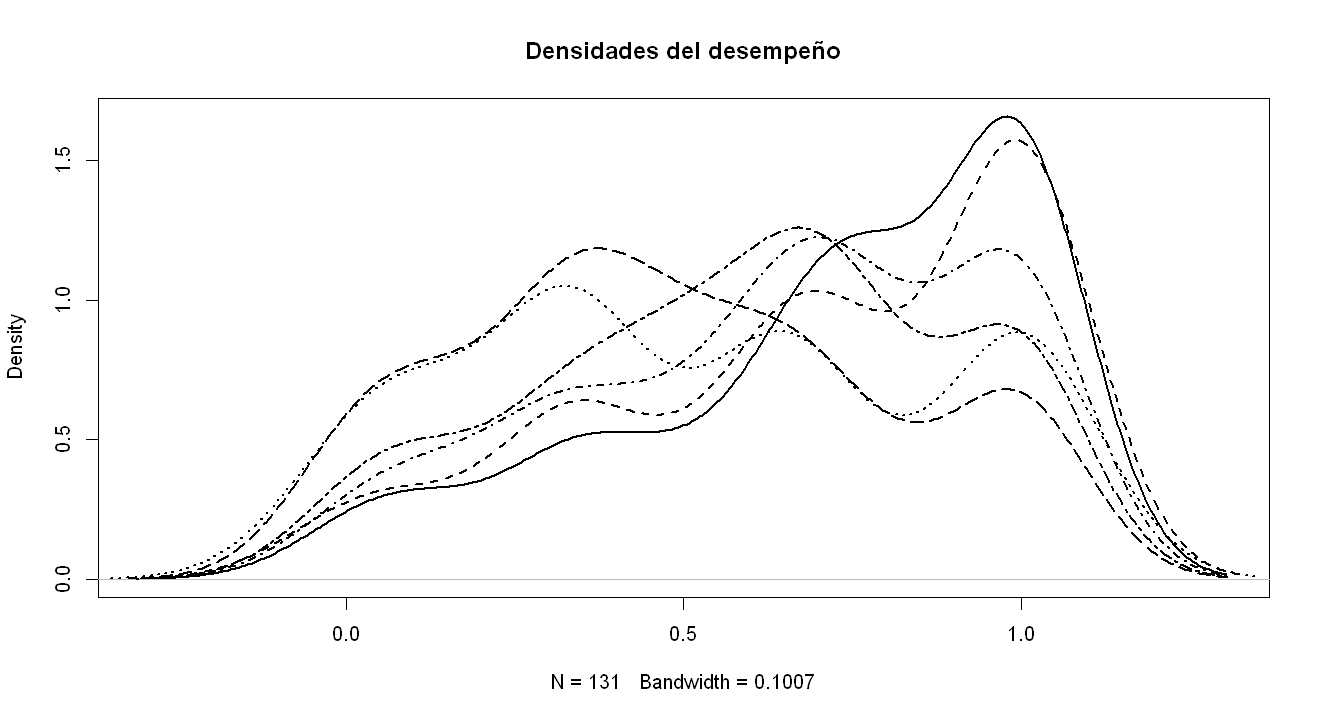

In [5]:
plot(density(data$KNN),col="black", lwd=2, lty=1, main="Densidades del desempeño")
lines(density(data$RBF_SVM),col="black", lwd=2, lty=2)
lines(density(data$Rand_Forest),col="black", lwd=2, lty=3)
lines(density(data$AdaBoost),col="black", lwd=2, lty=4)
lines(density(data$Naive_Bayes),col="black", lwd=2, lty=5)
lines(density(data$QDA),col="black", lwd=2, lty=6)

In [6]:
data_clasifs=data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")]

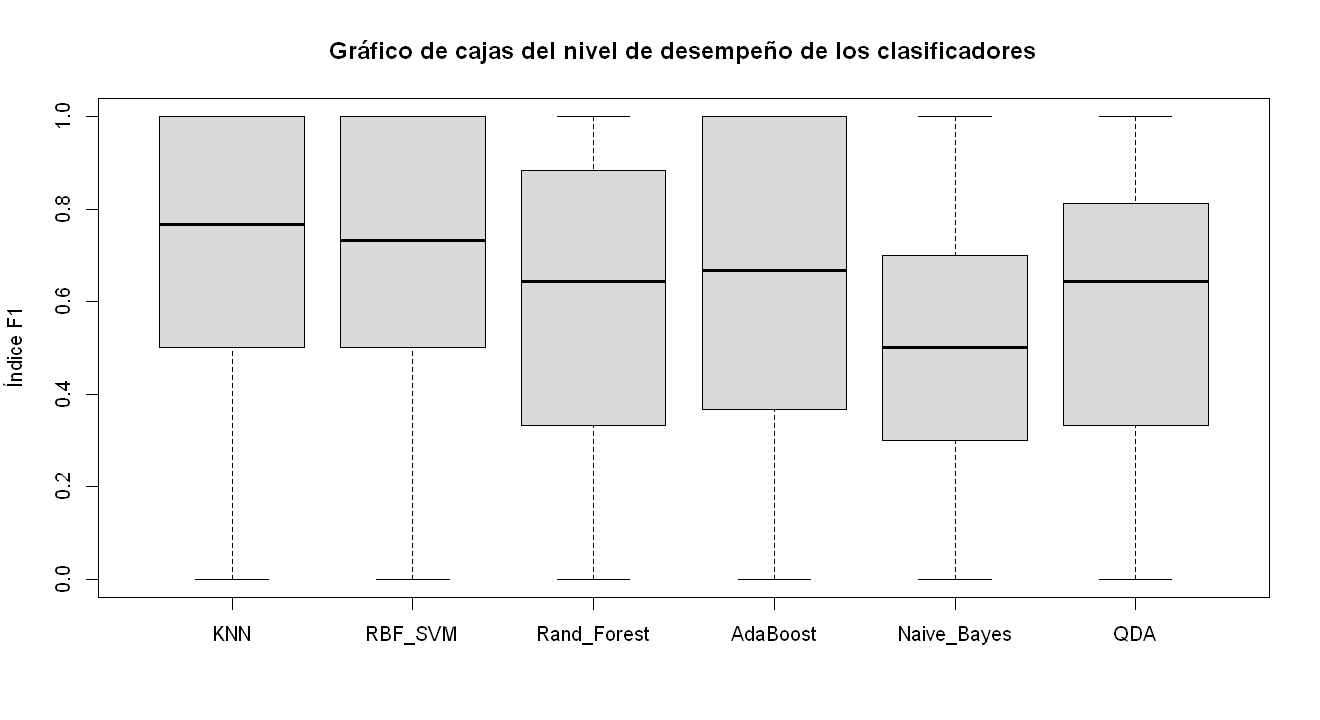

In [7]:
boxplot(data_clasifs, 
        col="gray85",
        ylab="Índice F1",
        main="Gráfico de cajas del nivel de desempeño de los clasificadores")

In [8]:
data_clasifs_melt=melt(data_clasifs)
colnames(data_clasifs_melt)=c("Clasificador","Desempeño")
data_clasifs_melt$Clasificador=factor(data_clasifs_melt$Clasificador, levels=c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))

head(data_clasifs_melt)

Using  as id variables


Clasificador,Desempeño
KNN,0.5
KNN,1.0
KNN,0.1
KNN,1.0
KNN,0.4
KNN,0.5


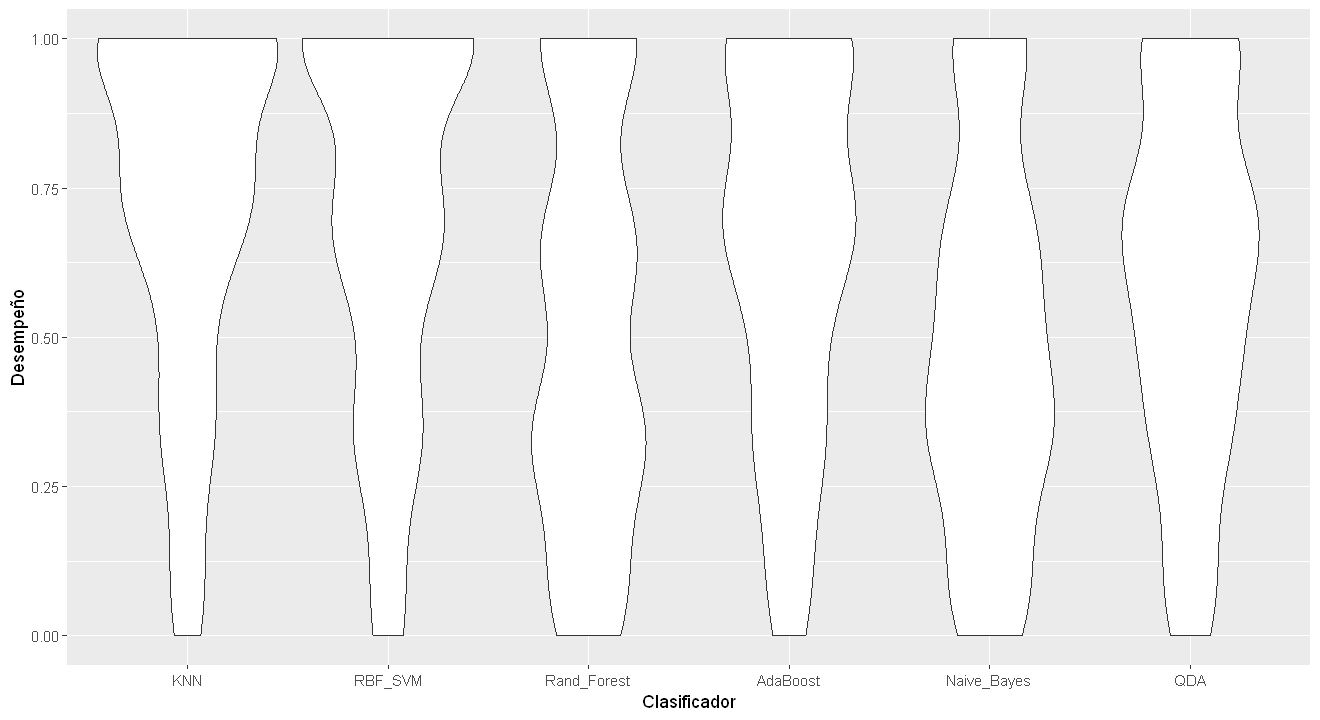

In [9]:
p <- ggplot(data_clasifs_melt, aes(Clasificador,Desempeño))
p + geom_violin()
# p + geom_violin(scale = "count")

In [10]:
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(plotly)

Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1       v purrr   0.3.0  
v tidyr   0.8.2       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.0.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::%+%()  masks crayon::%+%()
x tidyr::expand() masks reshape::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::recode() masks car::recode()
x dplyr::rename() masks reshape::rename()
x dplyr::select() masks MASS::select()
x purrr::some()   masks car::some()
Warning message:
"package 'hrbrthemes' was built under R version 3.5.3"NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.
      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and
      if Arial Narrow is not on your system, please 

Joining, by = "Clasificador"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font 

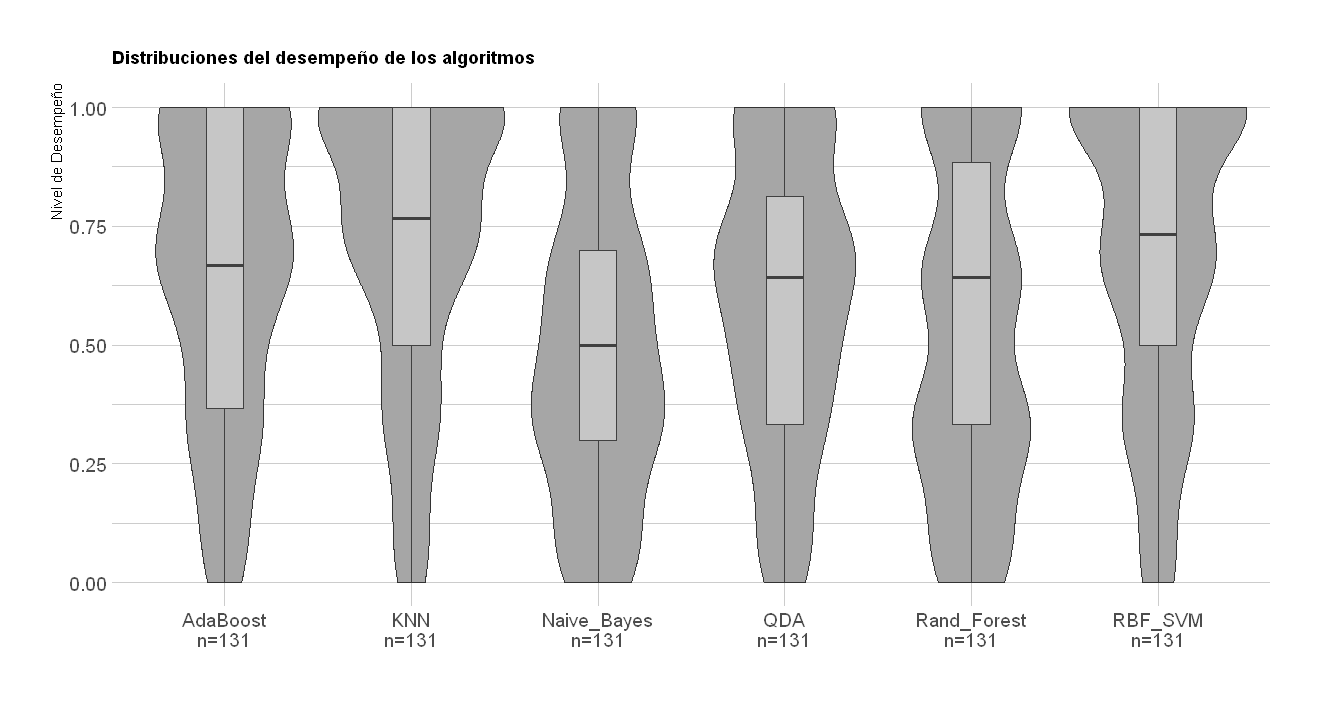

In [11]:
# sample size
sample_size = data_clasifs_melt %>% group_by(Clasificador) %>% summarize(num=n())


# Plot
data_clasifs_melt %>%
  left_join(sample_size) %>%
  mutate(myaxis = paste0(Clasificador, "\n", "n=", num)) %>%
  ggplot( aes(x=myaxis, y=Desempeño)) +
    geom_violin(width=1, fill="gray65") + #width=1.4
    geom_boxplot(width=.2, color="gray25", alpha=0.5, fill="gray90") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Distribuciones del desempeño de los algoritmos") +
    xlab("")+
    ylab("Nivel de Desempeño")

# two-way ANOVA

In [12]:
dat_AOV=melt(data,#[,c("process_6","process_2","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")],
             id.vars = c("process_6","process_2","IRT_difficulty"), 
             measure.vars = c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))
colnames(dat_AOV)=c("process_6","process_2","IRT_difficulty","Clasificador","Desempeño")
dat_AOV$Clasificador=factor(dat_AOV$Clasificador, levels=c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))

,Df,F value,Pr(>F)
group,17,0.9045514,0.5685919
,768,NA,NA


                        Df Sum Sq Mean Sq F value         Pr(>F)    
Clasificador             5   5.48  1.0968  11.217 0.000000000187 ***
process_2                2   0.50  0.2519   2.577         0.0767 .  
Clasificador:process_2  10   0.28  0.0276   0.282         0.9851    
Residuals              768  75.09  0.0978                           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Desempeño ~ Clasificador + process_2 + Clasificador:process_2, data = dat_AOV)

$Clasificador
                               diff          lwr          upr     p adj
RBF_SVM-KNN             -0.02428244 -0.134662345  0.086097459 0.9889018
Rand_Forest-KNN         -0.19215267 -0.302532574 -0.081772770 0.0000120
AdaBoost-KNN            -0.07935878 -0.189738680  0.031021123 0.3128842
Naive_Bayes-KNN         -0.23016031 -0.340540207 -0.119780404 0.0000001
QDA-KNN                 -0.12718321 -0.237563108 -0.016803304 0.0132663
Rand_Forest-RBF_SVM     -0.16787023 -0.278250131 -0.057490327 0.0002283
AdaBoost-RBF_SVM        -0.05507634 -0.165456238  0.055303566 0.7114678
Naive_Bayes-RBF_SVM     -0.20587786 -0.316257764 -0.095497961 0.0000019
QDA-RBF_SVM             -0.10290076 -0.213280665  0.007479138 0.0839371
AdaBoost-Rand_Forest     0.11279389  0.002413991  0.223173795 0.0418906
Naive_Bayes-Rand_Fo

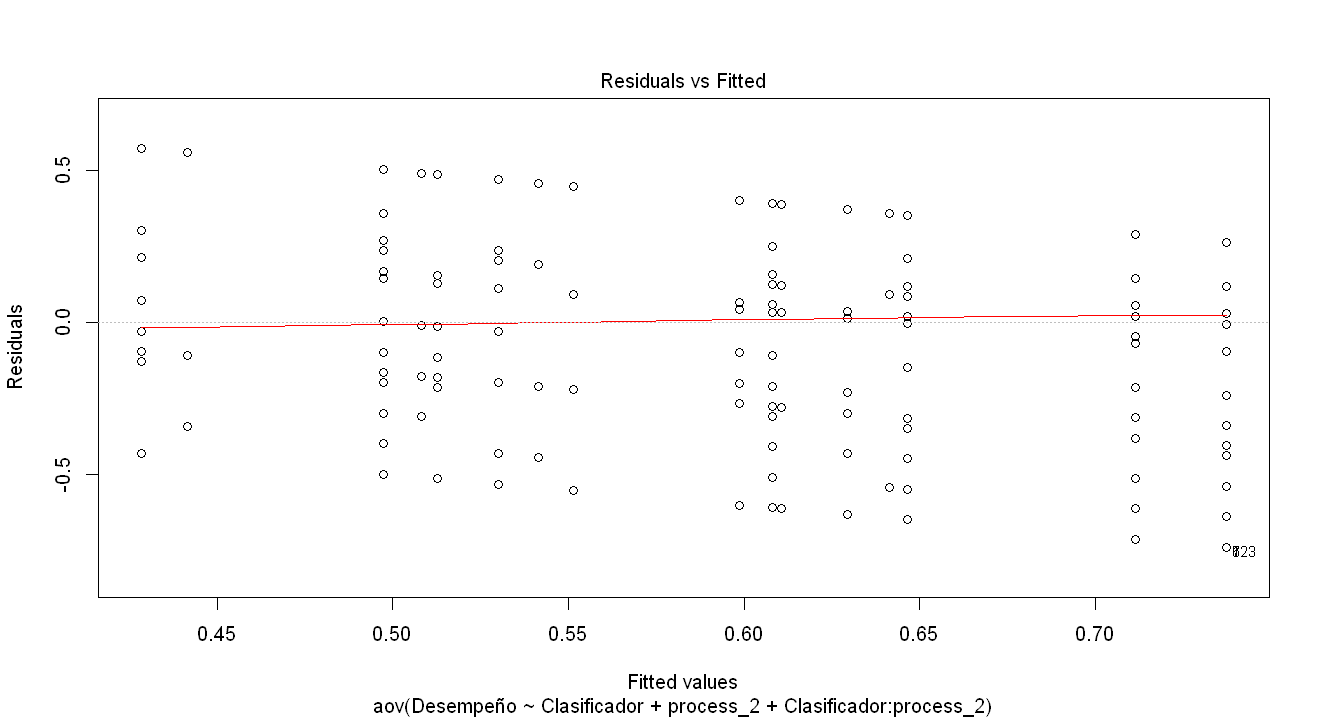

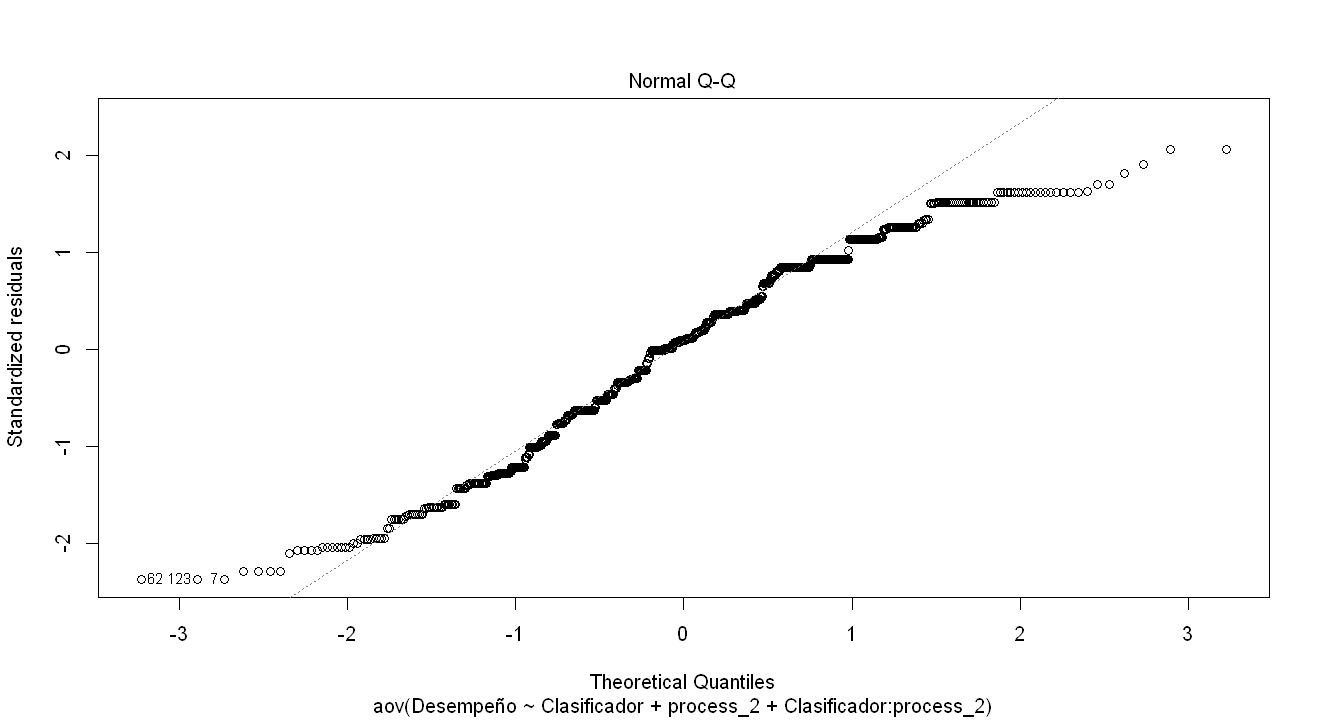

In [13]:
leveneTest(Desempeño ~ Clasificador * process_2, data = dat_AOV)
process_2_aov <- aov(Desempeño ~ Clasificador + process_2 + Clasificador:process_2, data = dat_AOV)
summary(process_2_aov)
TukeyHSD(process_2_aov,which ="Clasificador")
plot(process_2_aov, 1)
plot(process_2_aov, 2) 

,Df,F value,Pr(>F)
group,41,0.8810844,0.6839878
,744,NA,NA


                        Df Sum Sq Mean Sq F value         Pr(>F)    
Clasificador             5   5.48  1.0968  11.101 0.000000000248 ***
process_6                6   0.87  0.1451   1.468          0.186    
Clasificador:process_6  30   1.50  0.0499   0.505          0.988    
Residuals              744  73.50  0.0988                           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

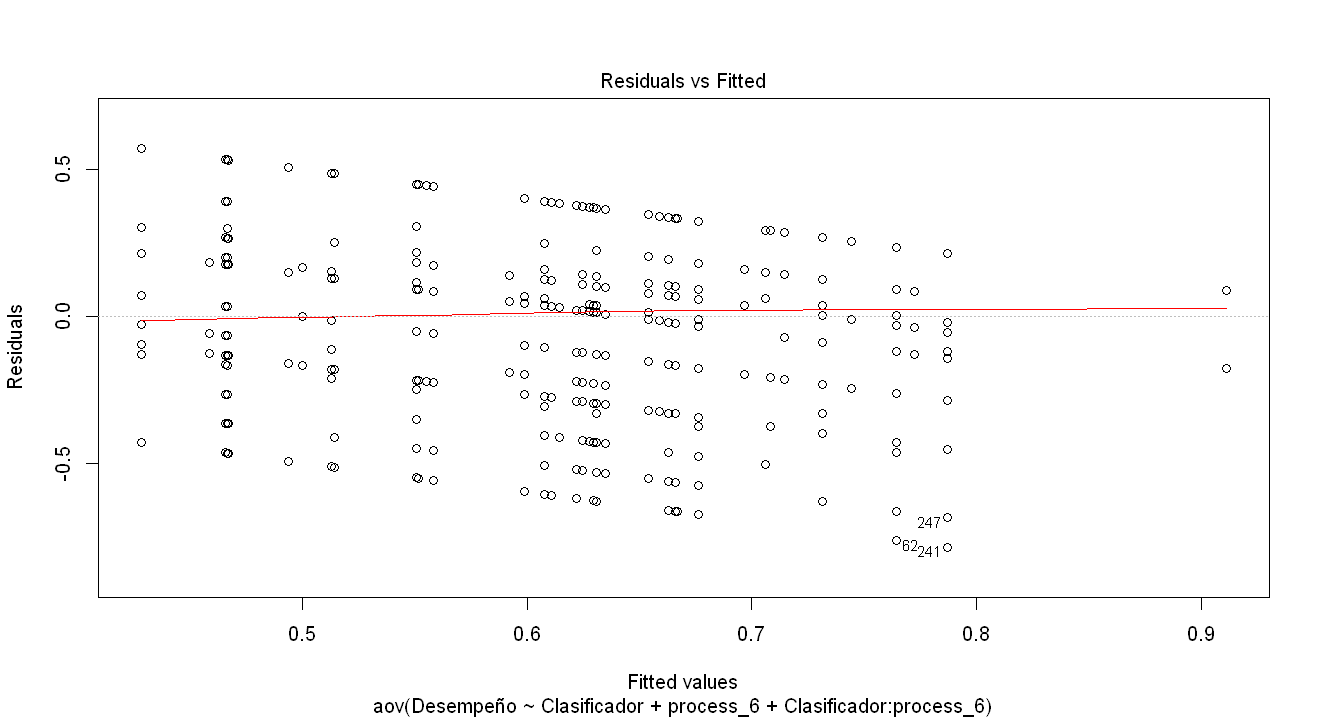

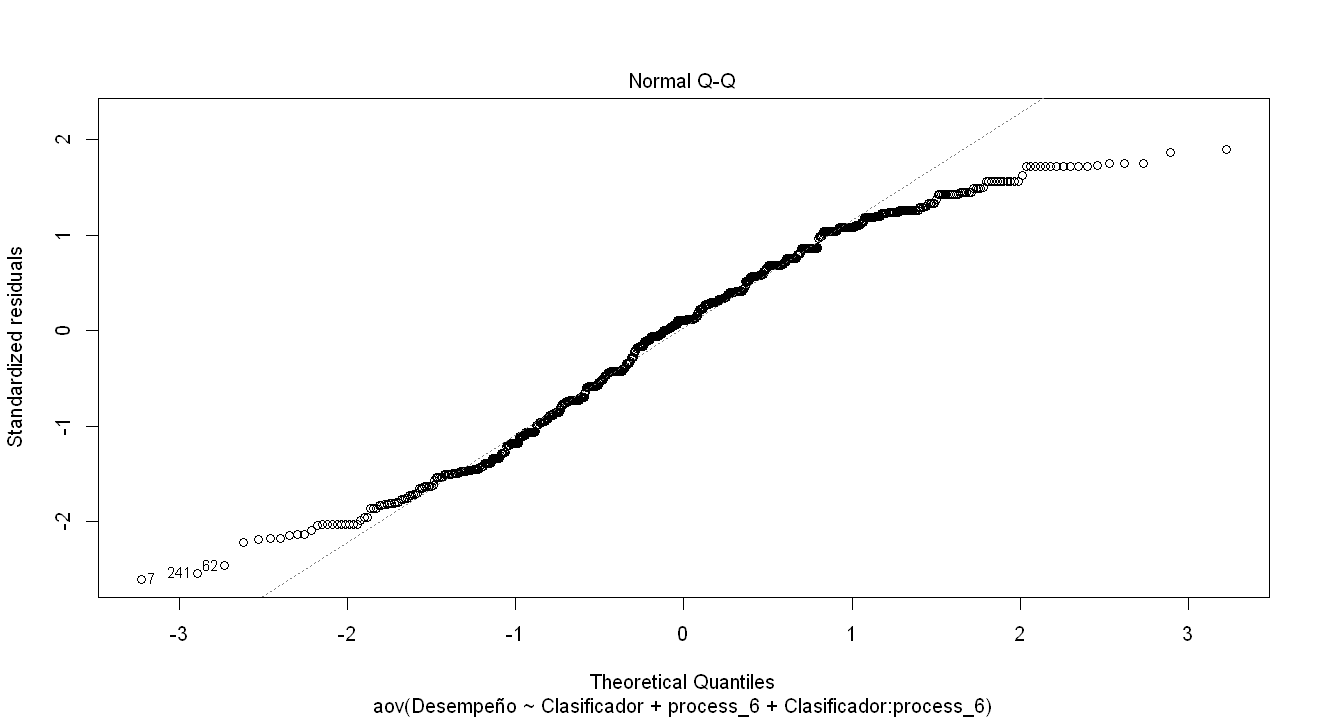

In [14]:
leveneTest(Desempeño ~ Clasificador * process_6, data = dat_AOV)
process_6_aov <- aov(Desempeño ~ Clasificador + process_6 + Clasificador:process_6, data = dat_AOV)
summary(process_6_aov)
plot(process_6_aov, 1)
plot(process_6_aov, 2) 

,Df,F value,Pr(>F)
group,2,0.2851786,0.7523564
,128,NA,NA


             Df Sum Sq Mean Sq F value Pr(>F)
process_2     2   4.27   2.134   2.215  0.113
Residuals   128 123.27   0.963               

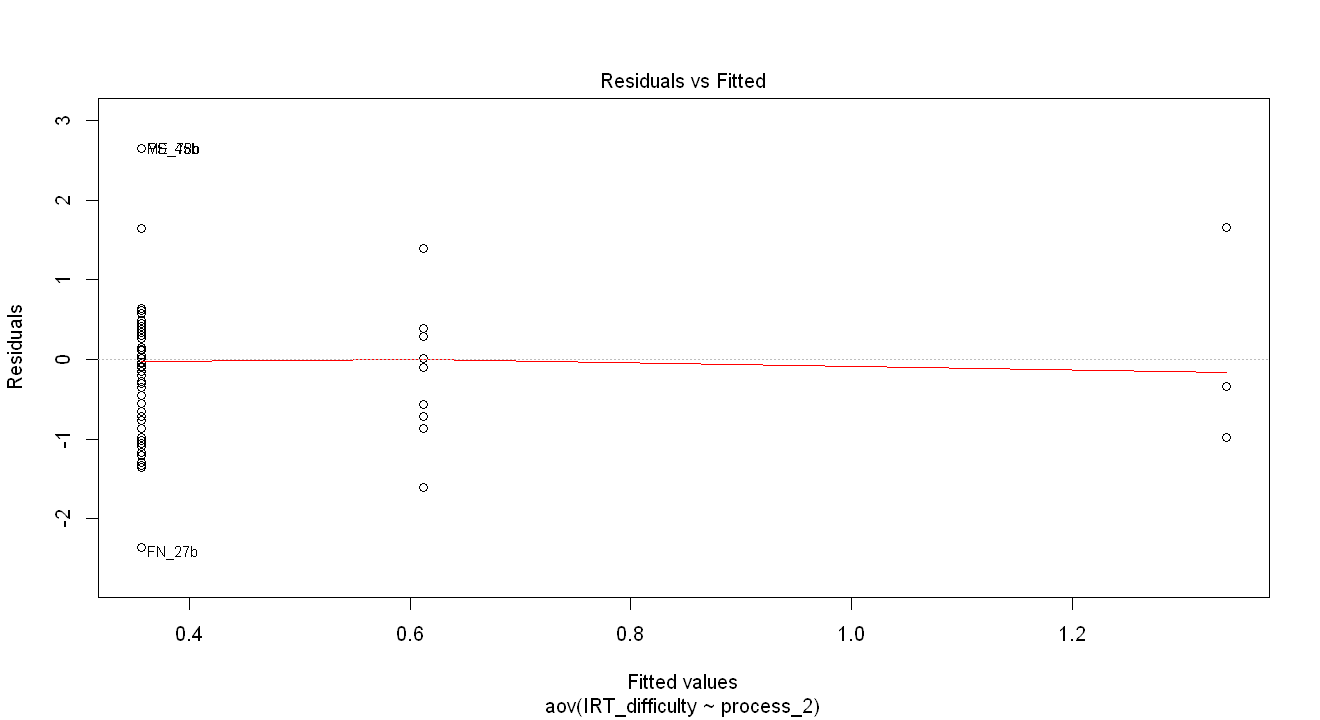

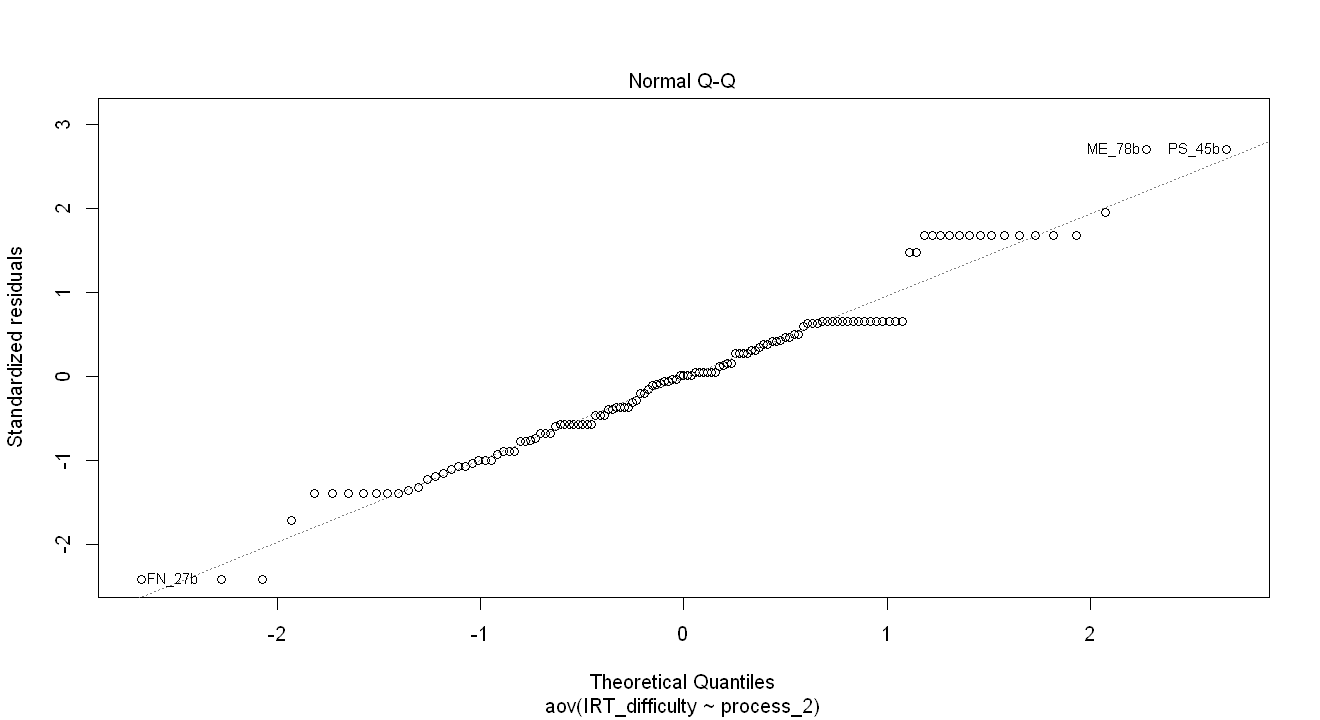

In [15]:
leveneTest(IRT_difficulty ~ process_2, data = data)
irt_process_2_aov <- aov(IRT_difficulty ~ process_2, data = data)
summary(irt_process_2_aov)
plot(irt_process_2_aov, 1)
plot(irt_process_2_aov, 2) 

,Df,F value,Pr(>F)
group,6,0.956021,0.4579699
,124,NA,NA


             Df Sum Sq Mean Sq F value Pr(>F)  
process_6     6  13.45  2.2410   2.436 0.0293 *
Residuals   124 114.09  0.9201                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

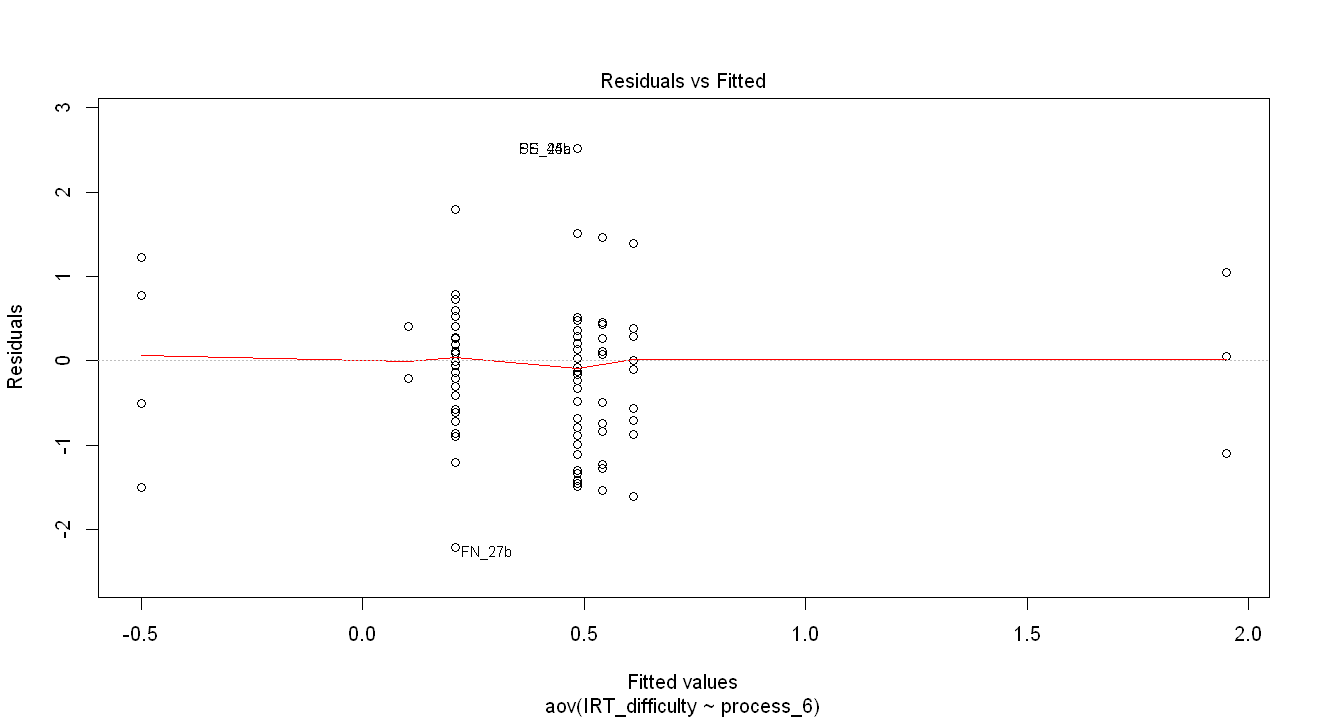

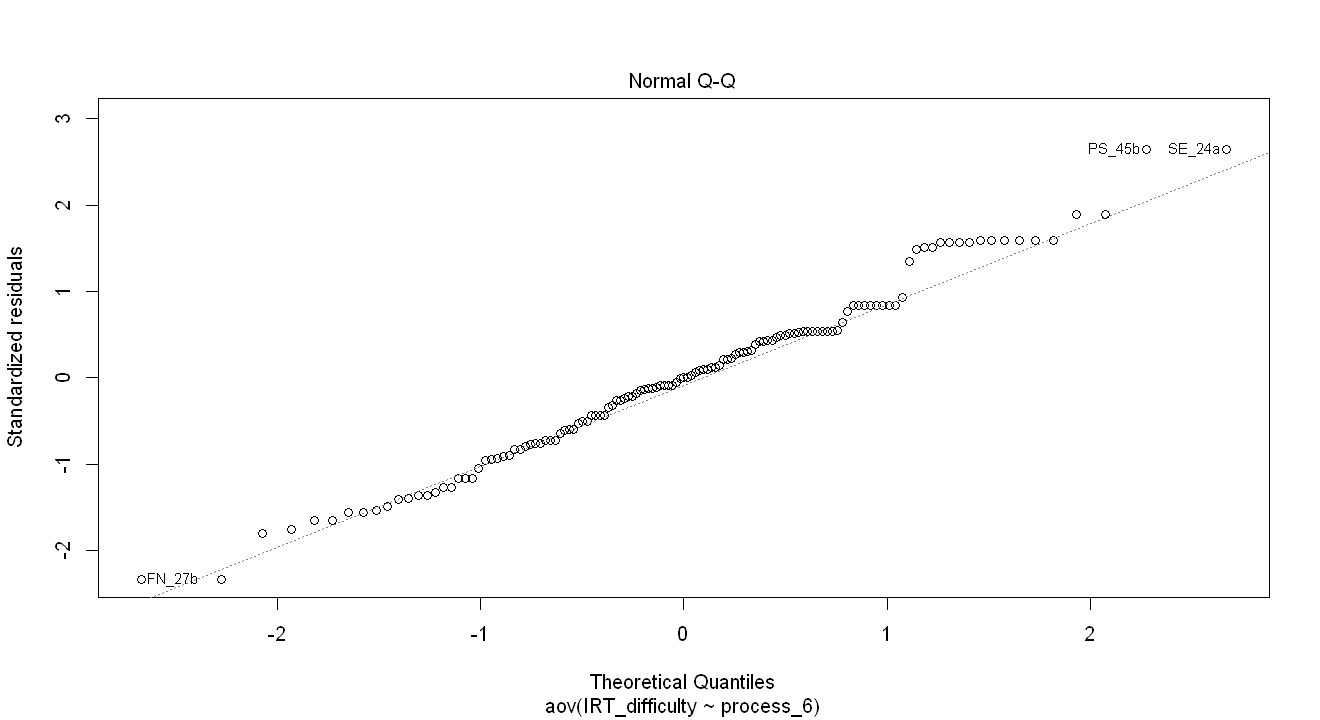

In [16]:
leveneTest(IRT_difficulty ~ process_6, data = data)
irt_process_6_aov <- aov(IRT_difficulty ~ process_6, data = data)
summary(irt_process_6_aov)
plot(irt_process_6_aov, 1)
plot(irt_process_6_aov, 2) 

# t-test

In [17]:
t.test(IRT_difficulty ~ process_2, data=data_2)
t.test(KNN ~ process_2, data=data_2)
t.test(RBF_SVM ~ process_2, data=data_2)
t.test(Rand_Forest ~ process_2, data=data_2)
t.test(AdaBoost ~ process_2, data=data_2)
t.test(Naive_Bayes ~ process_2, data=data_2)
t.test(QDA ~ process_2, data=data_2)


	Welch Two Sample t-test

data:  IRT_difficulty by process_2
t = 0.94791, df = 14.085, p-value = 0.3592
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3214324  0.8310962
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6116667                0.3568348 



	Welch Two Sample t-test

data:  KNN by process_2
t = -1.0594, df = 12.694, p-value = 0.3092
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3283798  0.1126392
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6294167                0.7372870 



	Welch Two Sample t-test

data:  RBF_SVM by process_2
t = -0.90752, df = 12.604, p-value = 0.3812
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3419174  0.1400856
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6106667                0.7115826 



	Welch Two Sample t-test

data:  Rand_Forest by process_2
t = 0.18652, df = 12.855, p-value = 0.8549
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2277202  0.2707028
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5515000                0.5300087 



	Welch Two Sample t-test

data:  AdaBoost by process_2
t = -0.51151, df = 13.328, p-value = 0.6174
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2490068  0.1534734
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5988333                0.6466000 



	Welch Two Sample t-test

data:  Naive_Bayes by process_2
t = -0.79219, df = 14.023, p-value = 0.4414
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2547664  0.1173142
sample estimates:
   mean in group Retener mean in group Transferir 
               0.4285000                0.4972261 



	Welch Two Sample t-test

data:  QDA by process_2
t = -1.2009, df = 14.308, p-value = 0.2493
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.26519730  0.07457556
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5127500                0.6080609 


In [18]:
cor.test(data$IRT_difficulty, data$KNN)
cor.test(data$IRT_difficulty, data$RBF_SVM)
cor.test(data$IRT_difficulty, data$Rand_Forest)
cor.test(data$IRT_difficulty, data$AdaBoost)
cor.test(data$IRT_difficulty, data$Naive_Bayes)
cor.test(data$IRT_difficulty, data$QDA)


	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$KNN
t = -0.21171, df = 129, p-value = 0.8327
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1895566  0.1533788
sample estimates:
        cor 
-0.01863703 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$RBF_SVM
t = -2.2204, df = 129, p-value = 0.02814
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.35180869 -0.02102738
sample estimates:
       cor 
-0.1918609 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Rand_Forest
t = 1.5888, df = 129, p-value = 0.1146
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03379468  0.30286269
sample estimates:
      cor 
0.1385338 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$AdaBoost
t = -0.22314, df = 129, p-value = 0.8238
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1905262  0.1523963
sample estimates:
        cor 
-0.01964261 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Naive_Bayes
t = -0.43806, df = 129, p-value = 0.6621
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2086866  0.1338698
sample estimates:
        cor 
-0.03854066 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$QDA
t = -0.28262, df = 129, p-value = 0.7779
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1955663  0.1472787
sample estimates:
        cor 
-0.02487522 


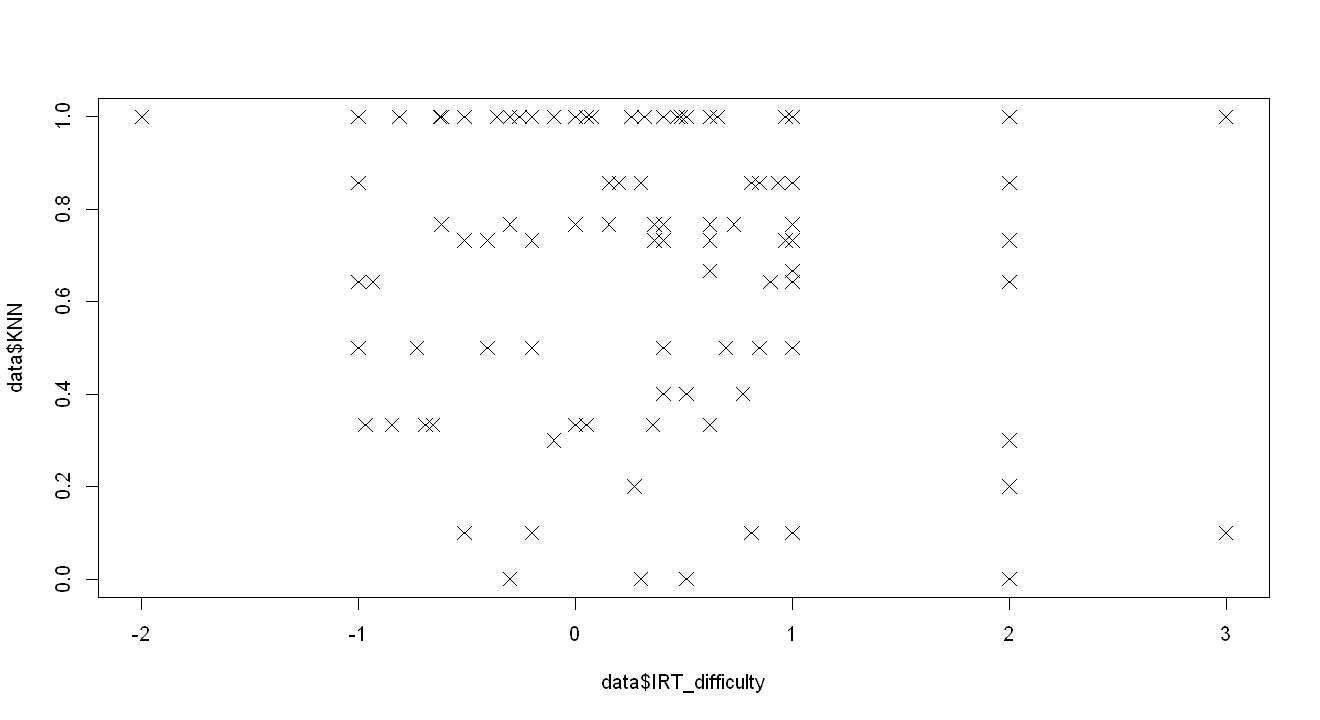

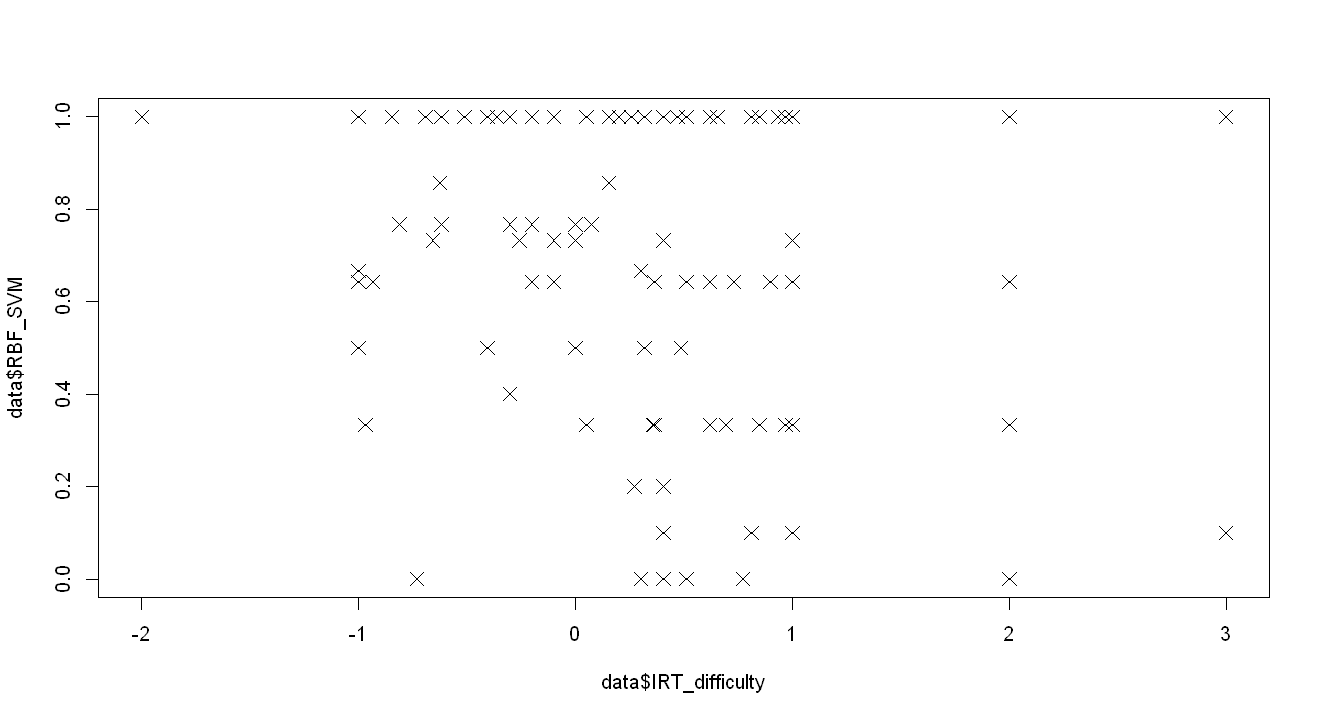

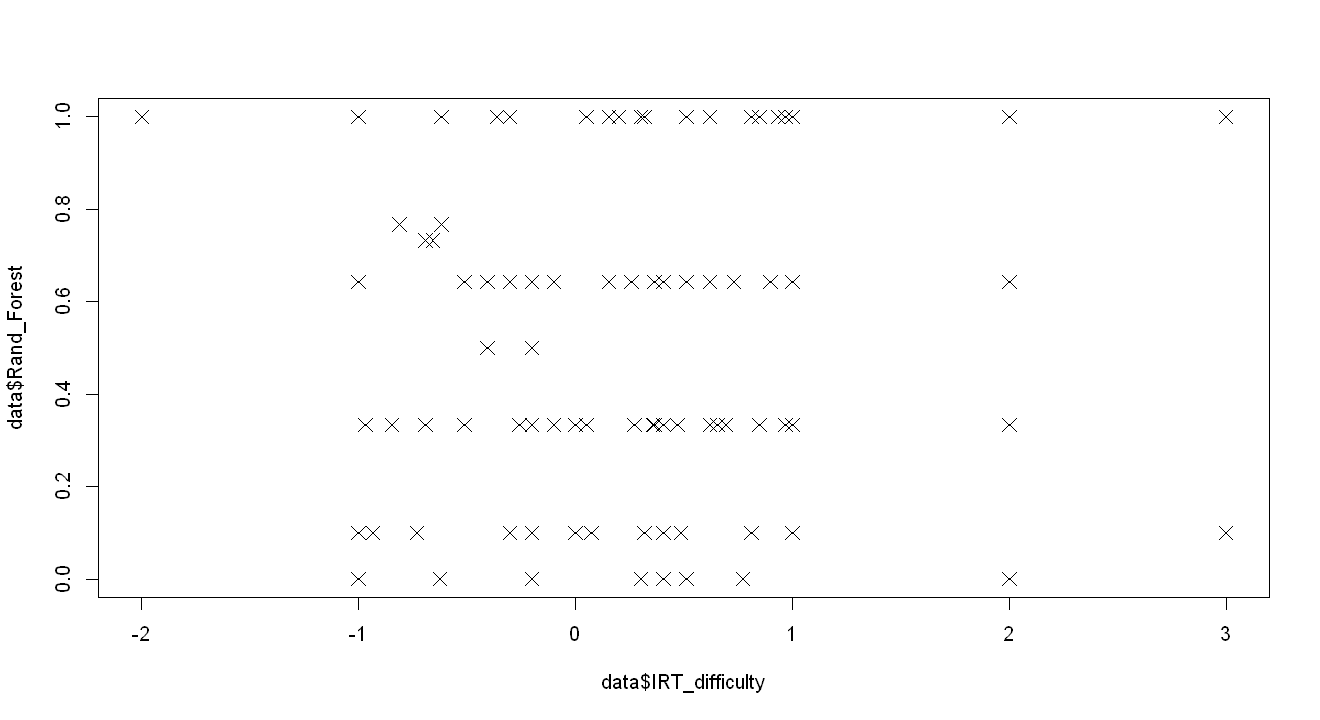

In [19]:
plot(data$IRT_difficulty, data$KNN, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
plot(data$IRT_difficulty, data$RBF_SVM, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
plot(data$IRT_difficulty, data$Rand_Forest, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$AdaBoost, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$Naive_Bayes, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$QDA, pch=(data_2$process_2=="remember")*16+4, cex=1.5)


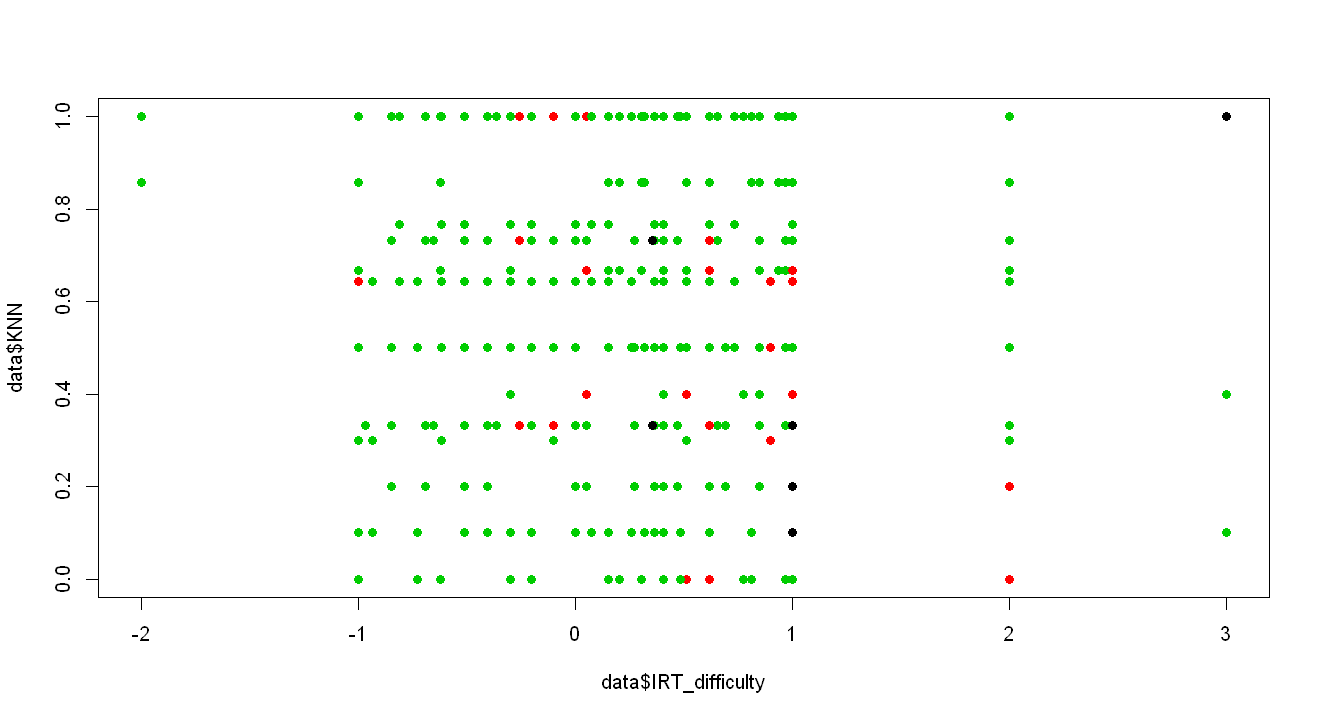

In [20]:
plot(data$IRT_difficulty, data$KNN, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$RBF_SVM, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$Rand_Forest, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$AdaBoost, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$Naive_Bayes, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$QDA, pch=16, col=data$process_2)

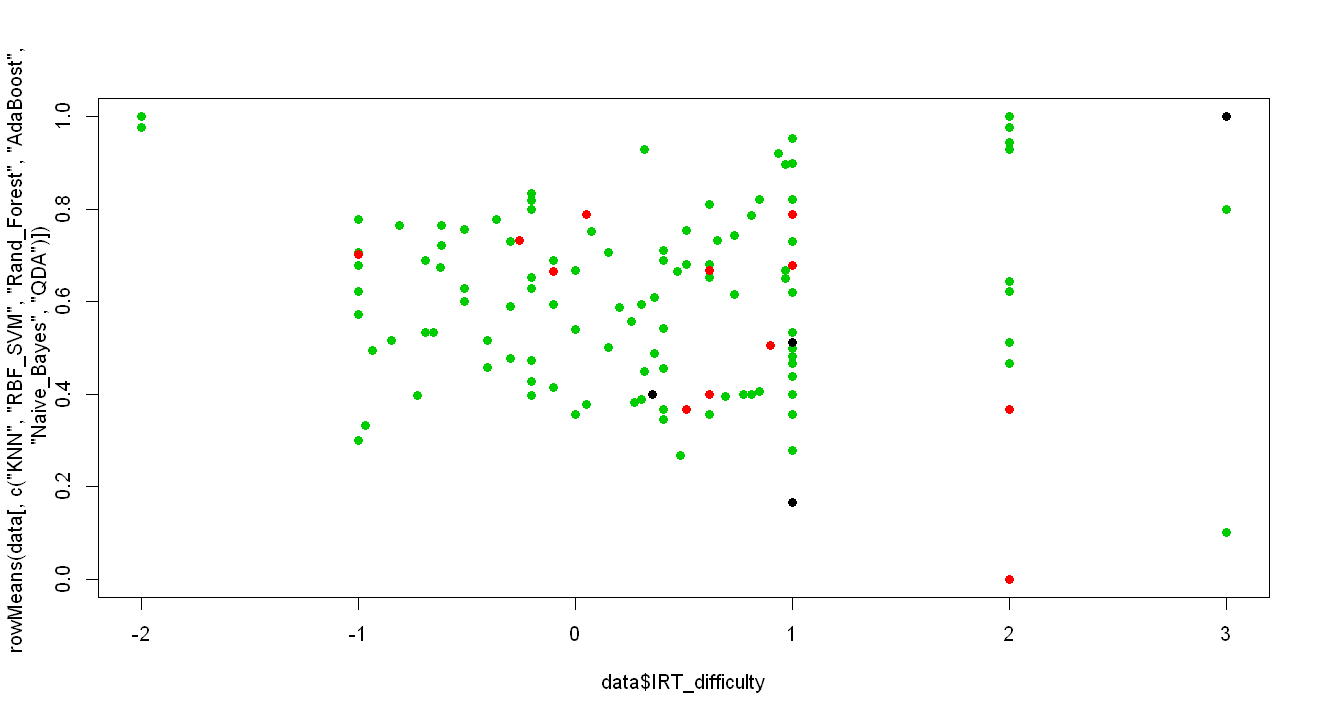

In [21]:
plot(data$IRT_difficulty, 
	rowMeans(data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")]),
	pch=16, col=data$process_2)

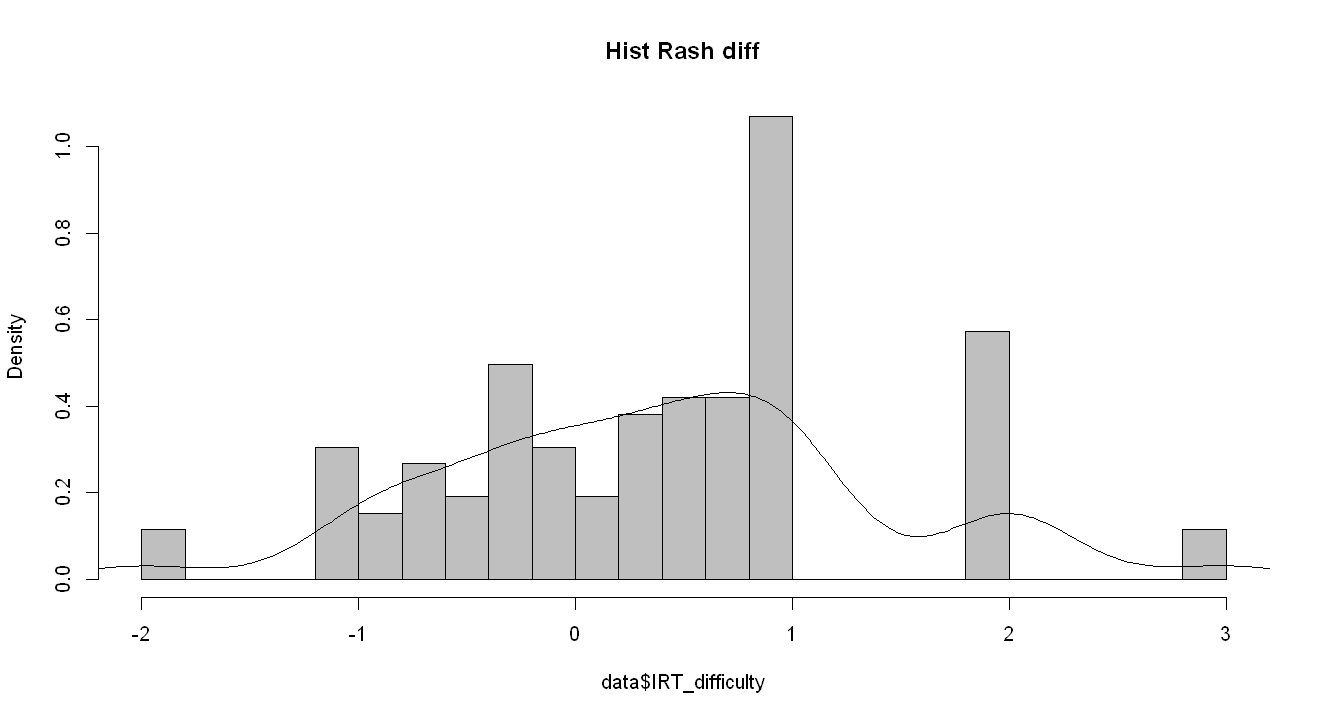

In [22]:
hist(data$IRT_difficulty, 
	col="gray75", 
	freq=FALSE,
	breaks=20,
	main="Hist Rash diff")
lines(density(data$IRT_difficulty))

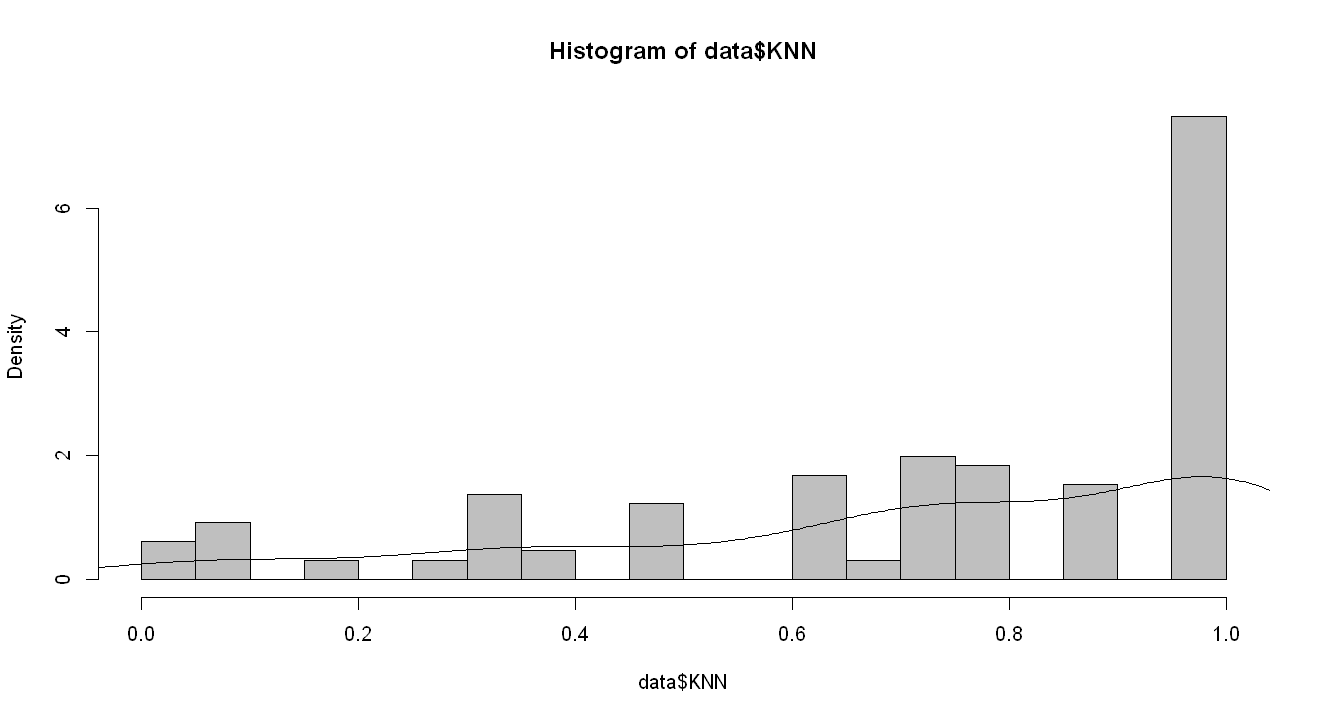

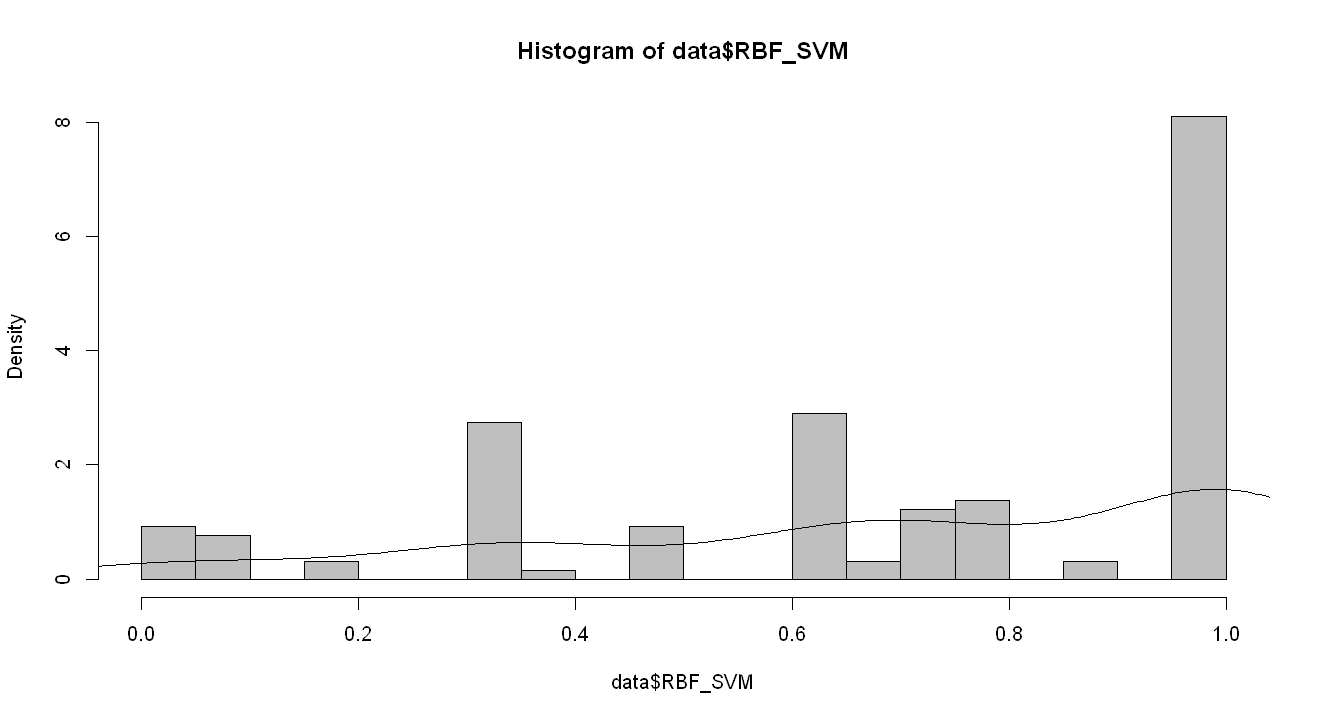

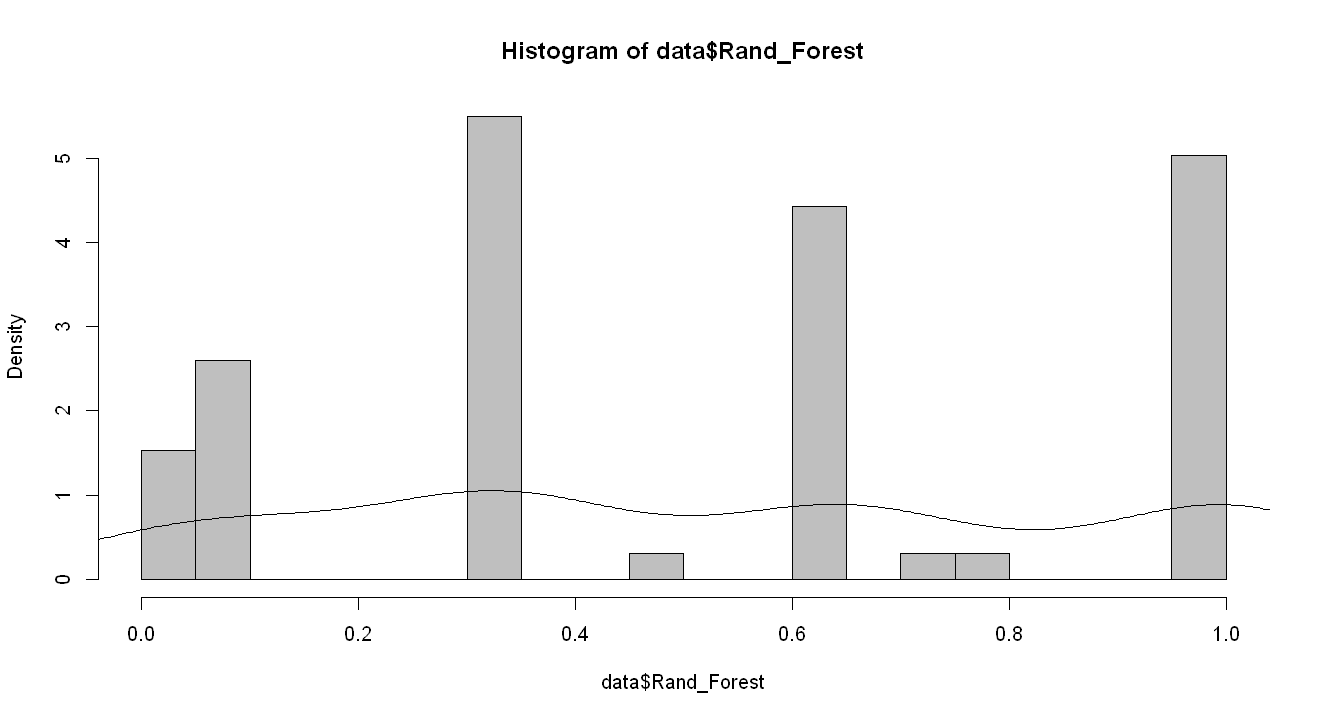

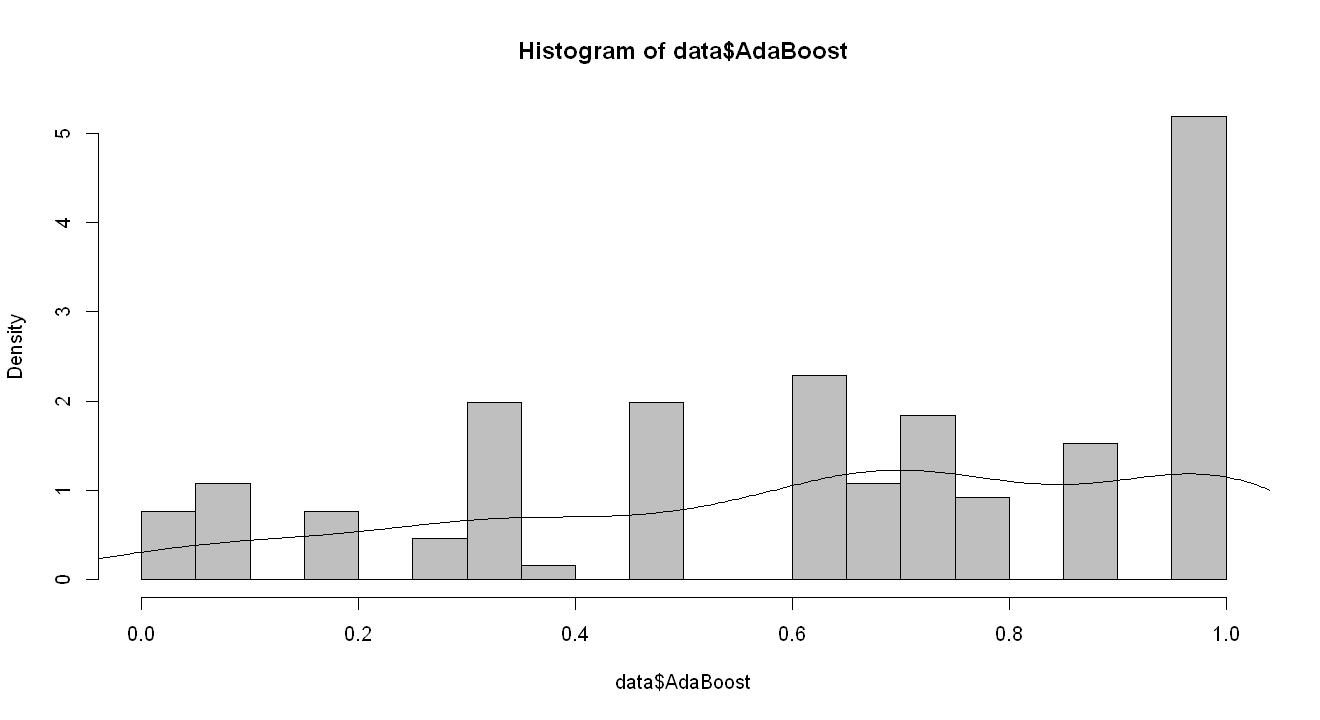

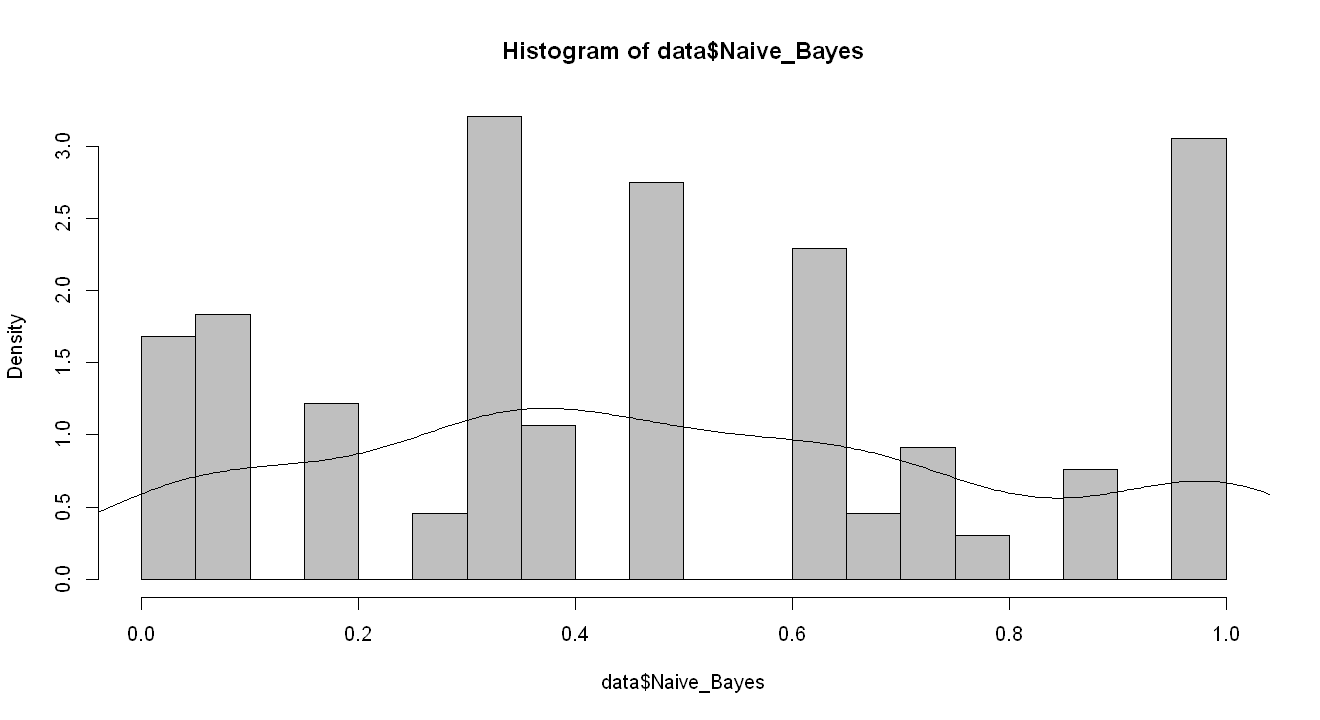

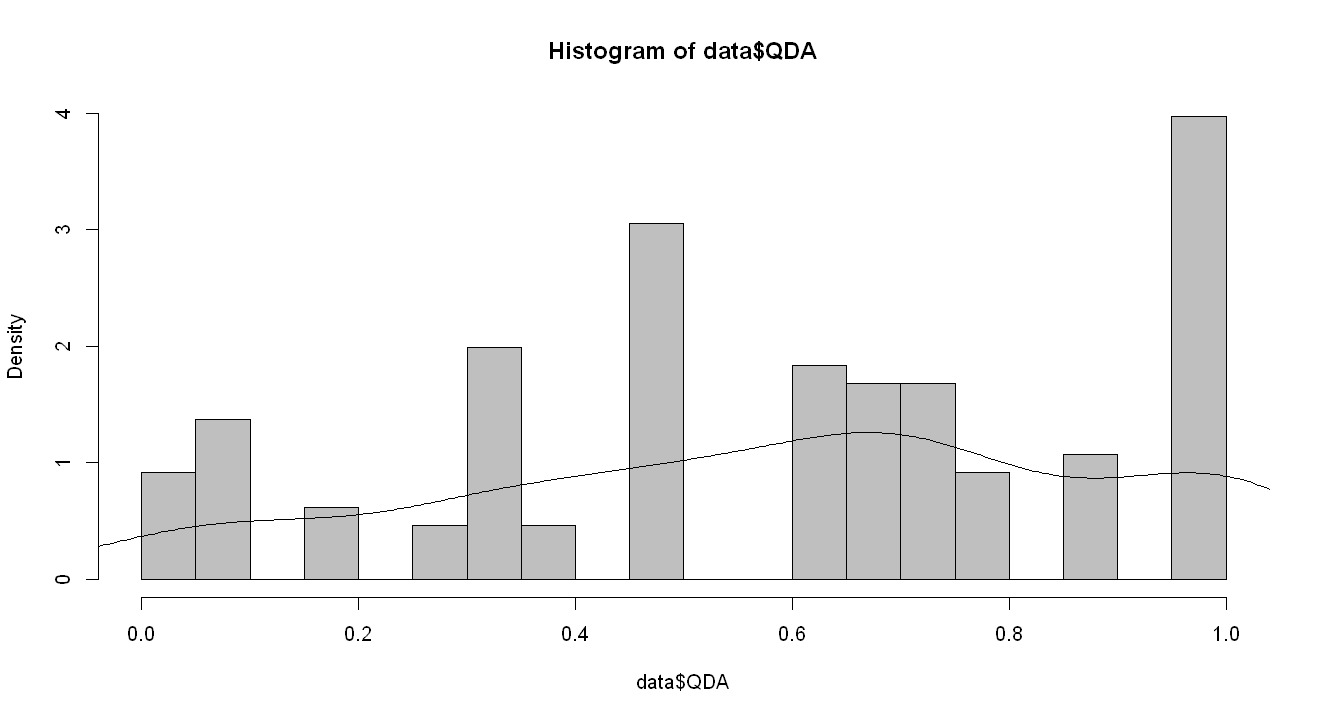

In [23]:
n_segm=20
hist(data$KNN, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$KNN))

hist(data$RBF_SVM, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$RBF_SVM))

hist(data$Rand_Forest, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$Rand_Forest))

hist(data$AdaBoost, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$AdaBoost))

hist(data$Naive_Bayes, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$Naive_Bayes))

hist(data$QDA, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$QDA))



# ANOVA 6 grupos
[guía](http://www.sthda.com/english/wiki/one-way-anova-test-in-r)

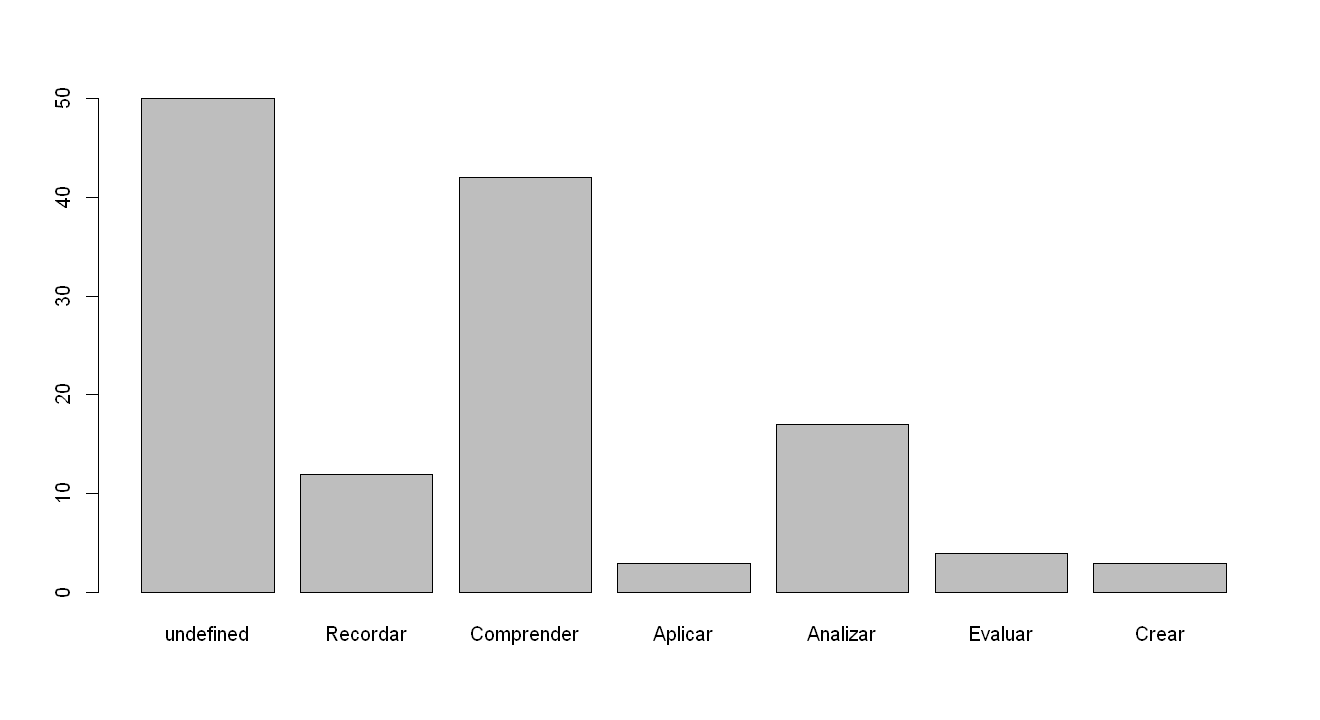

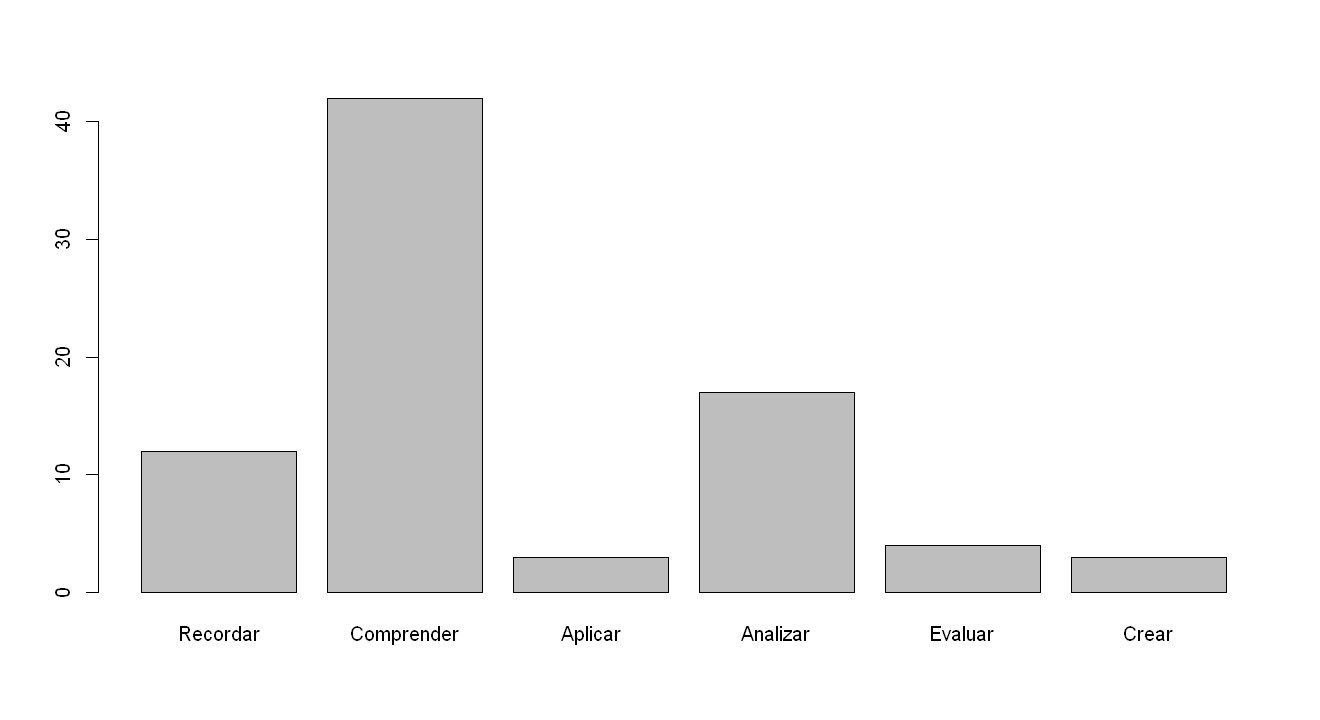

In [24]:
barplot(summary(data$process_6))
barplot(summary(data_6$process_6))

,Df,F value,Pr(>F)
group,5,0.4266297,0.828736
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.238 0.04753   0.493  0.781
Residuals   75  7.238 0.09651               

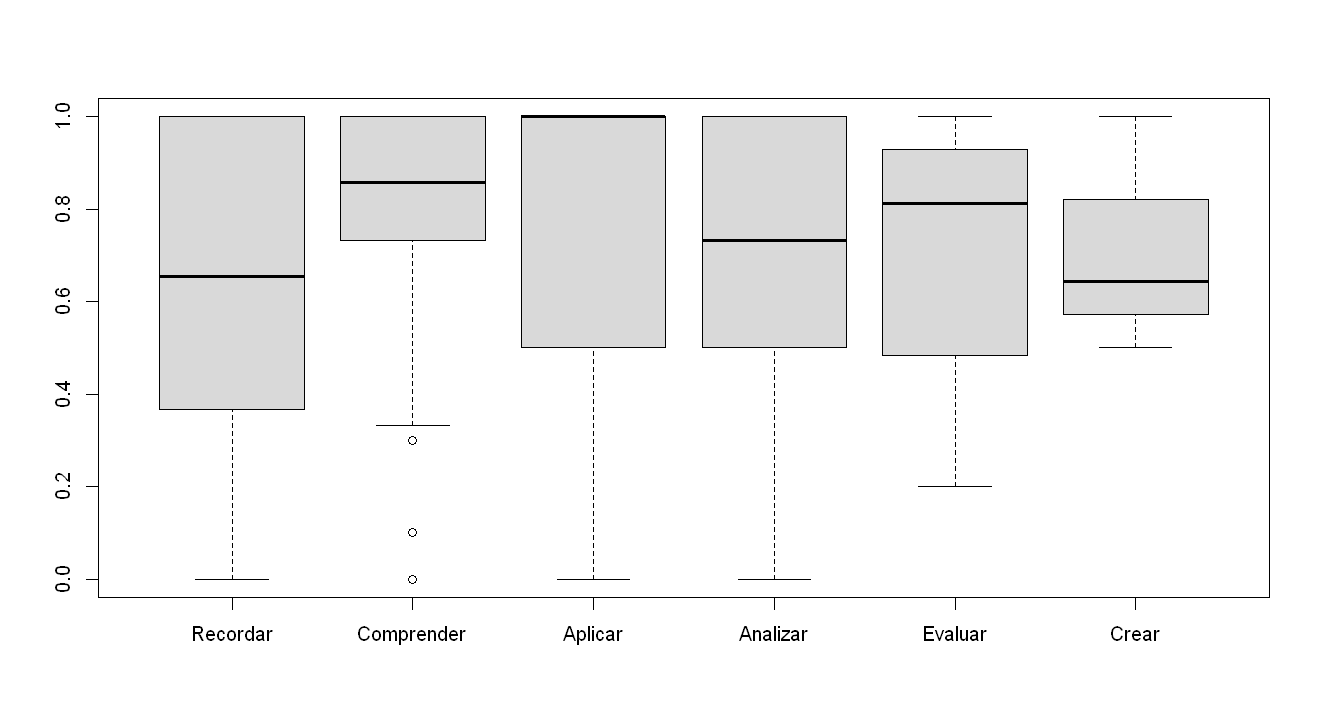

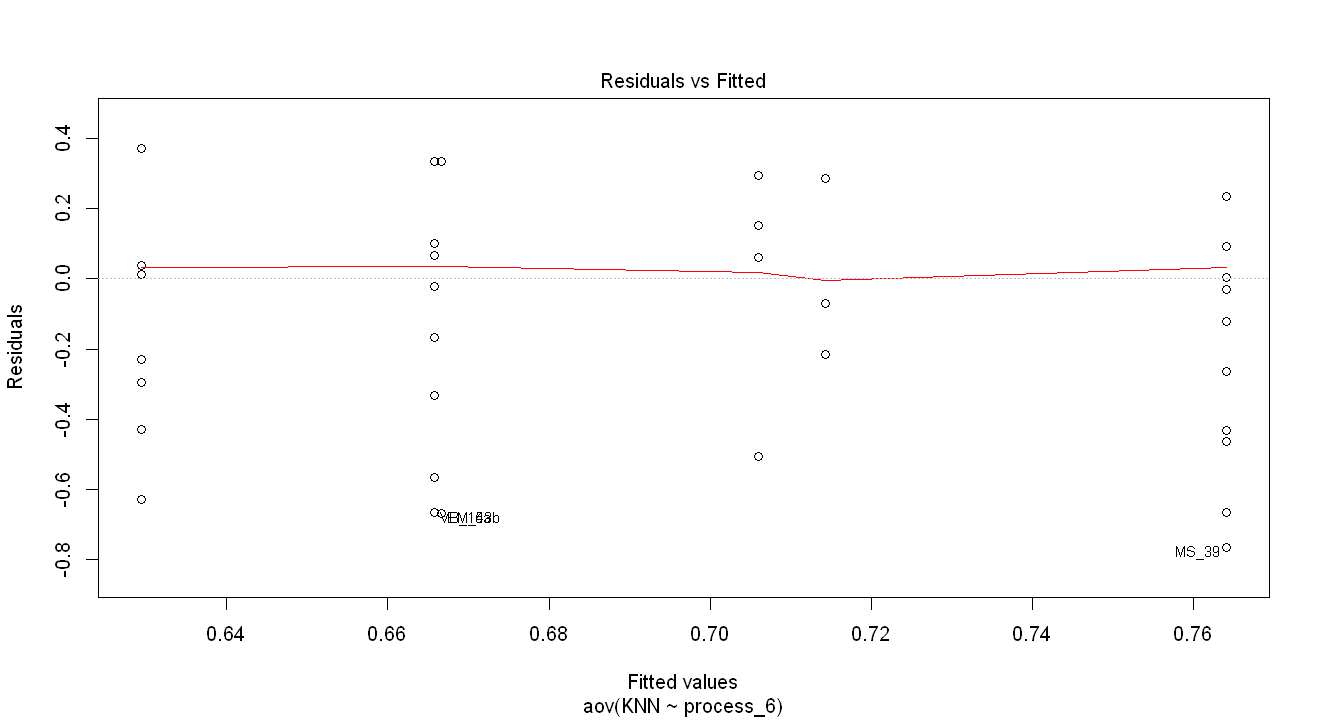

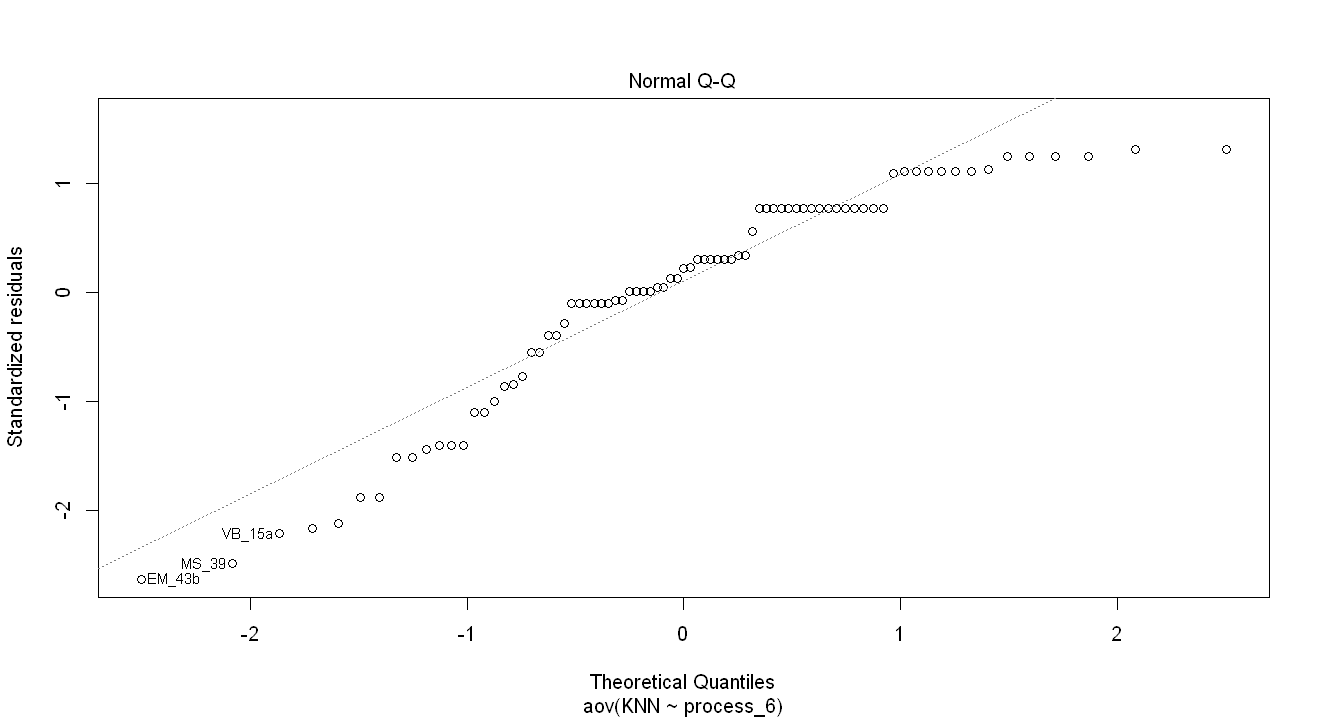

In [25]:
boxplot(KNN ~ process_6, data = data_6, col="gray85")
leveneTest(KNN ~ process_6, data = data_6)
aov_6_KNN <- aov(KNN ~ process_6, data = data_6)
summary(aov_6_KNN)
plot(aov_6_KNN, 1)
plot(aov_6_KNN, 2) 

,Df,F value,Pr(>F)
group,5,0.4677584,0.7990945
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.652  0.1303   1.373  0.244
Residuals   75  7.117  0.0949               

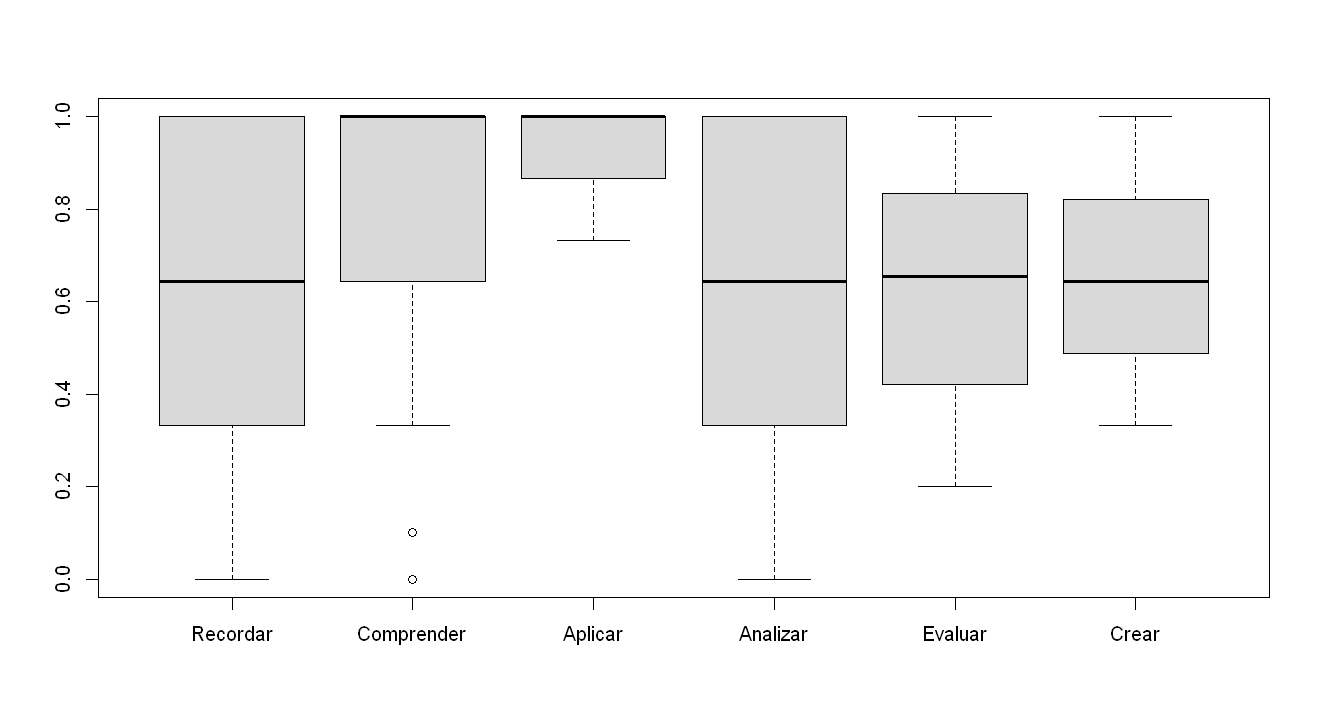

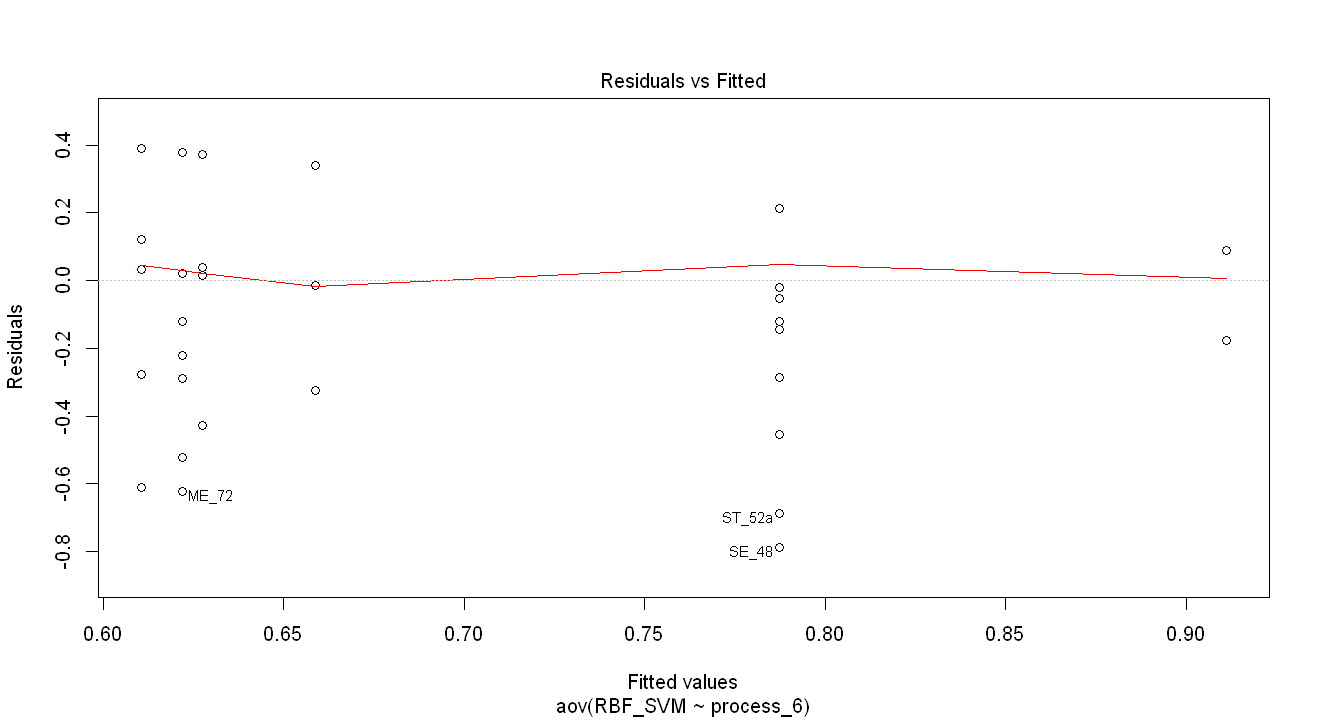

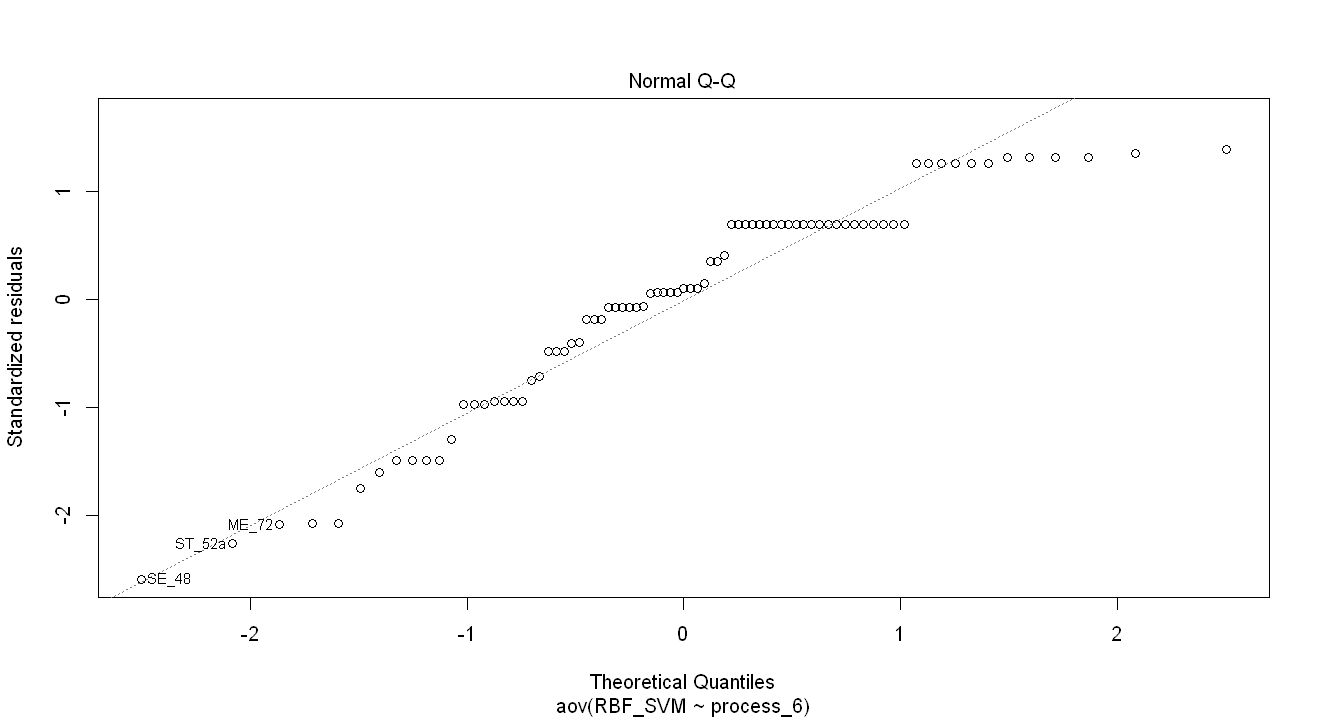

In [26]:
boxplot(RBF_SVM~ process_6, data = data_6, col="gray85")
leveneTest(RBF_SVM~ process_6, data = data_6)
aov_6_RBF_SVM<- aov(RBF_SVM~ process_6, data = data_6)
summary(aov_6_RBF_SVM)
plot(aov_6_RBF_SVM, 1)
plot(aov_6_RBF_SVM, 2) 


,Df,F value,Pr(>F)
group,5,0.2377552,0.9446055
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.158 0.03157    0.25  0.939
Residuals   75  9.482 0.12642               

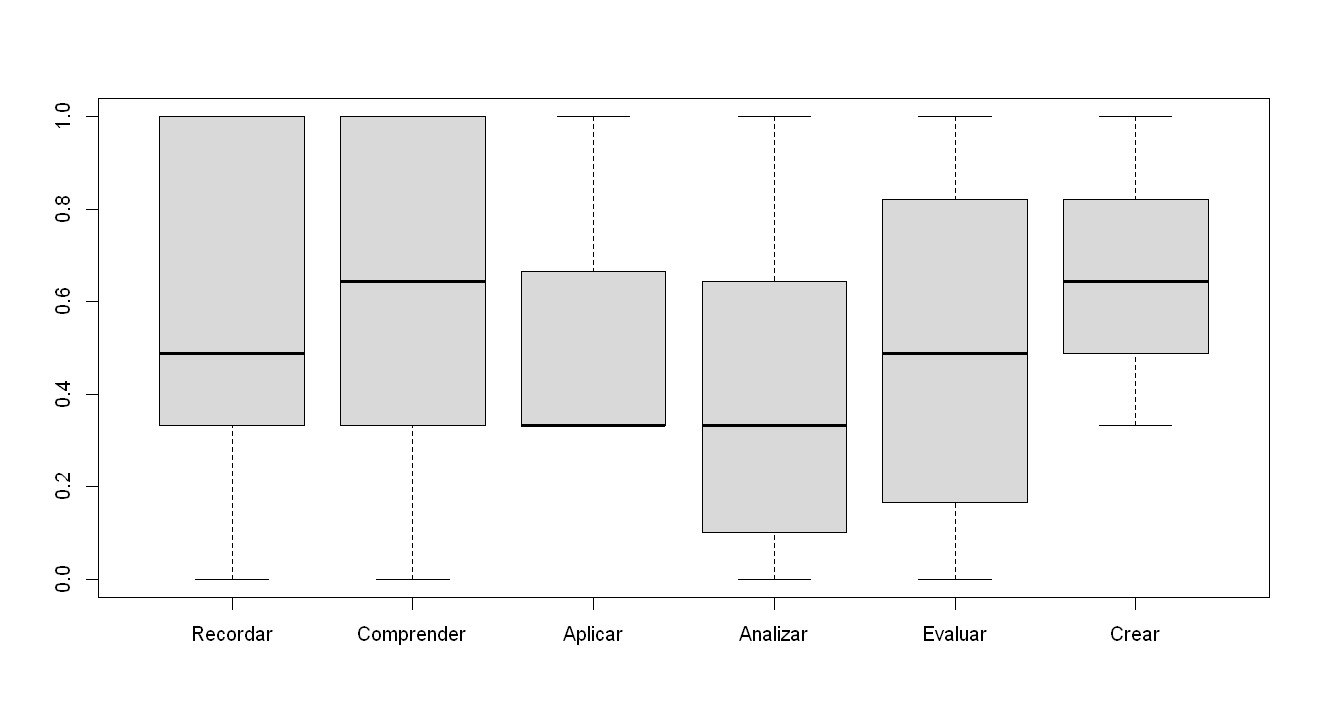

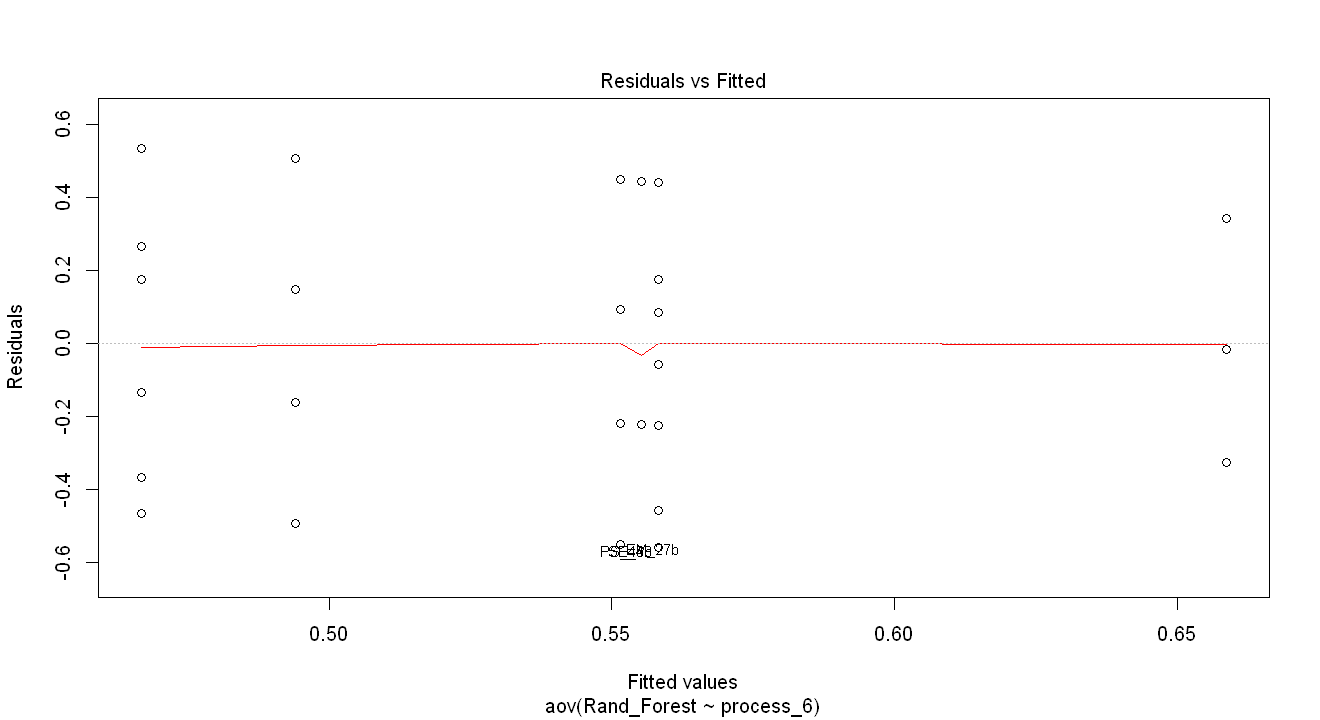

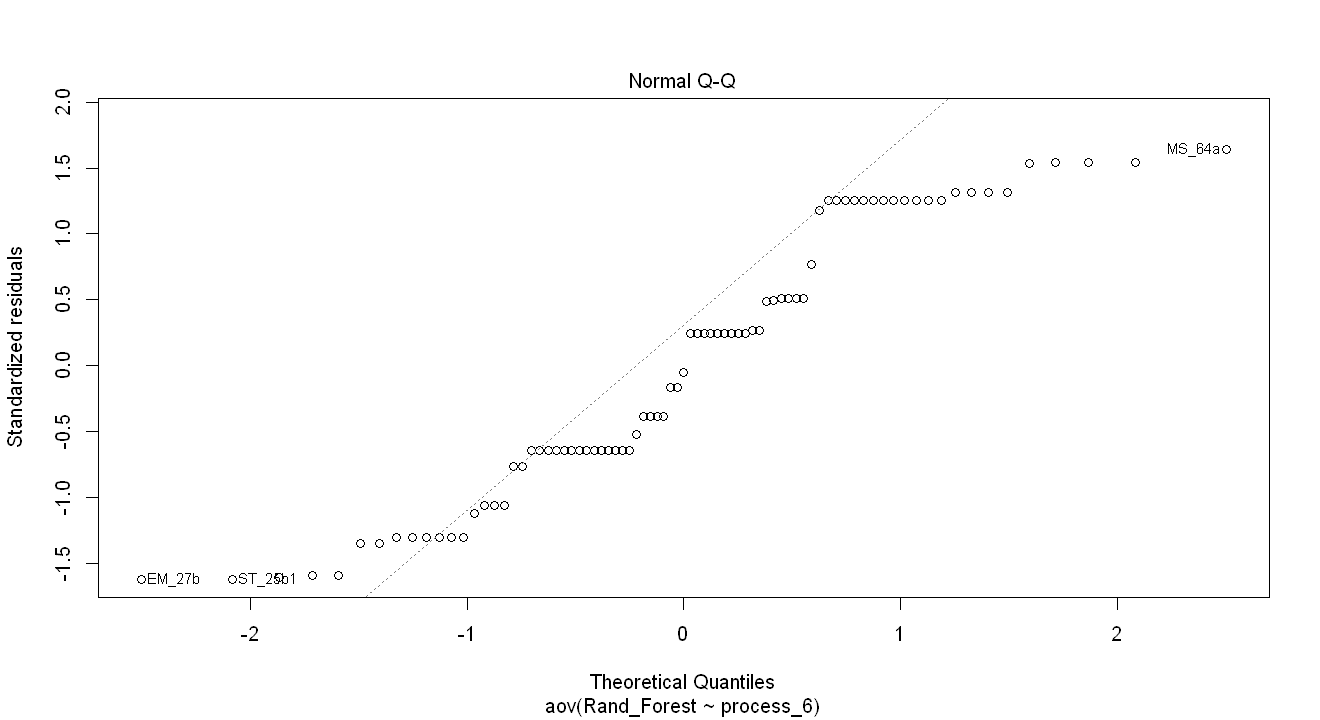

In [27]:
boxplot(Rand_Forest~ process_6, data = data_6, col="gray85")
leveneTest(Rand_Forest~ process_6, data = data_6)
aov_6_Rand_Forest<- aov(Rand_Forest~ process_6, data = data_6)
summary(aov_6_Rand_Forest)
plot(aov_6_Rand_Forest, 1)
plot(aov_6_Rand_Forest, 2) 

,Df,F value,Pr(>F)
group,5,1.893273,0.1055251
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.117 0.02335   0.248   0.94
Residuals   75  7.073 0.09431               

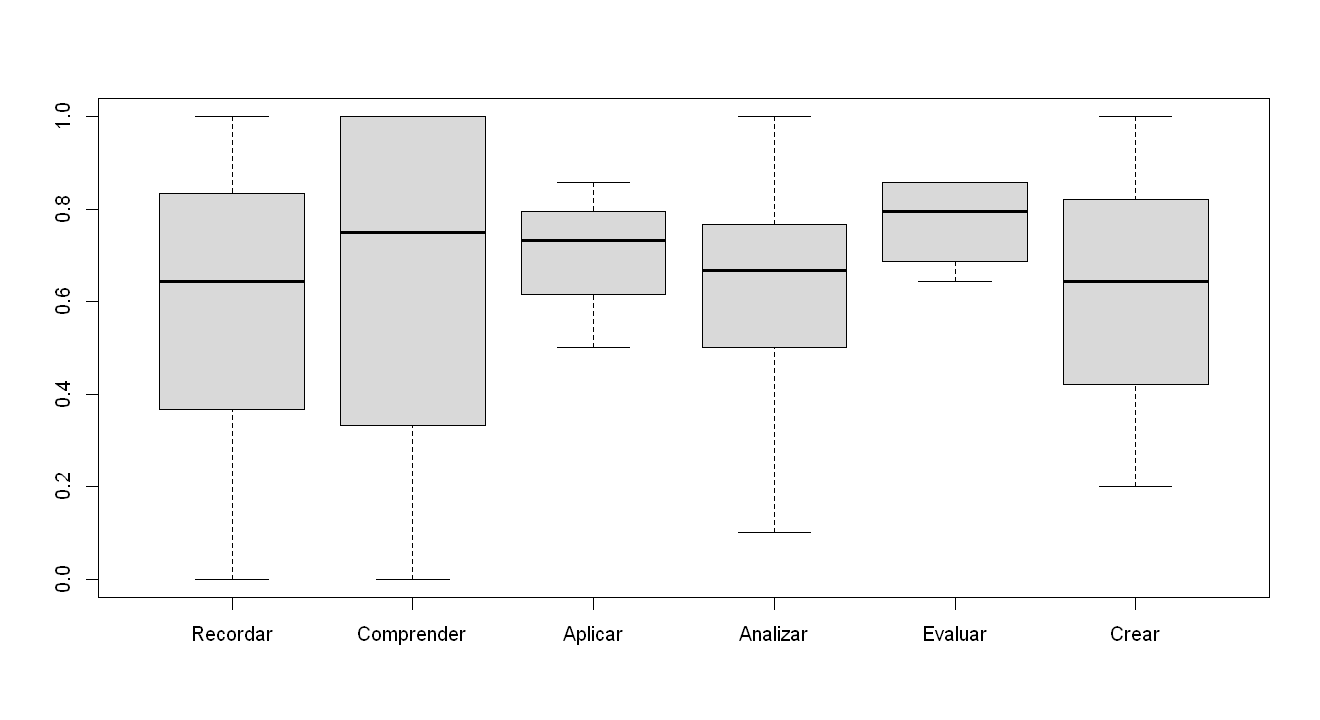

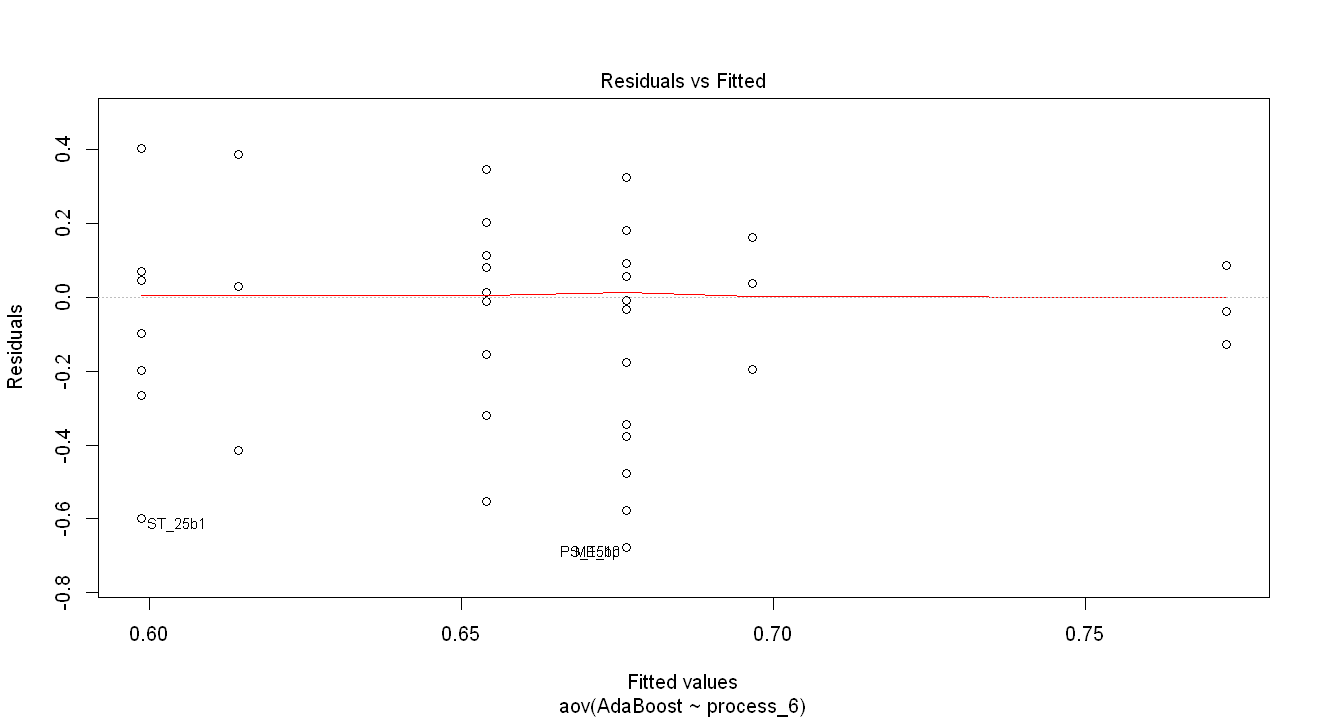

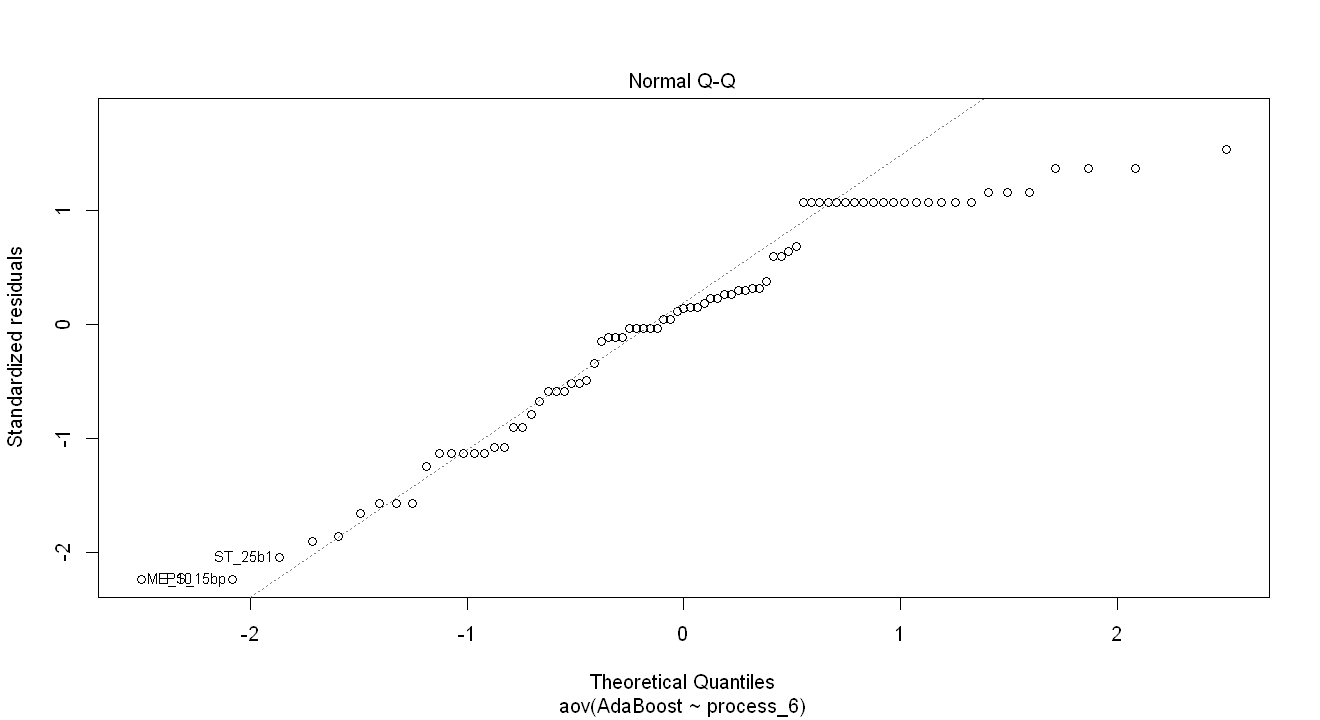

In [28]:
boxplot(AdaBoost~ process_6, data = data_6, col="gray85")
leveneTest(AdaBoost~ process_6, data = data_6)
aov_6_AdaBoost<- aov(AdaBoost~ process_6, data = data_6)
summary(aov_6_AdaBoost)
plot(aov_6_AdaBoost, 1)
plot(aov_6_AdaBoost, 2) 

,Df,F value,Pr(>F)
group,5,1.321606,0.2641875
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.546 0.10930   1.124  0.355
Residuals   75  7.295 0.09727               

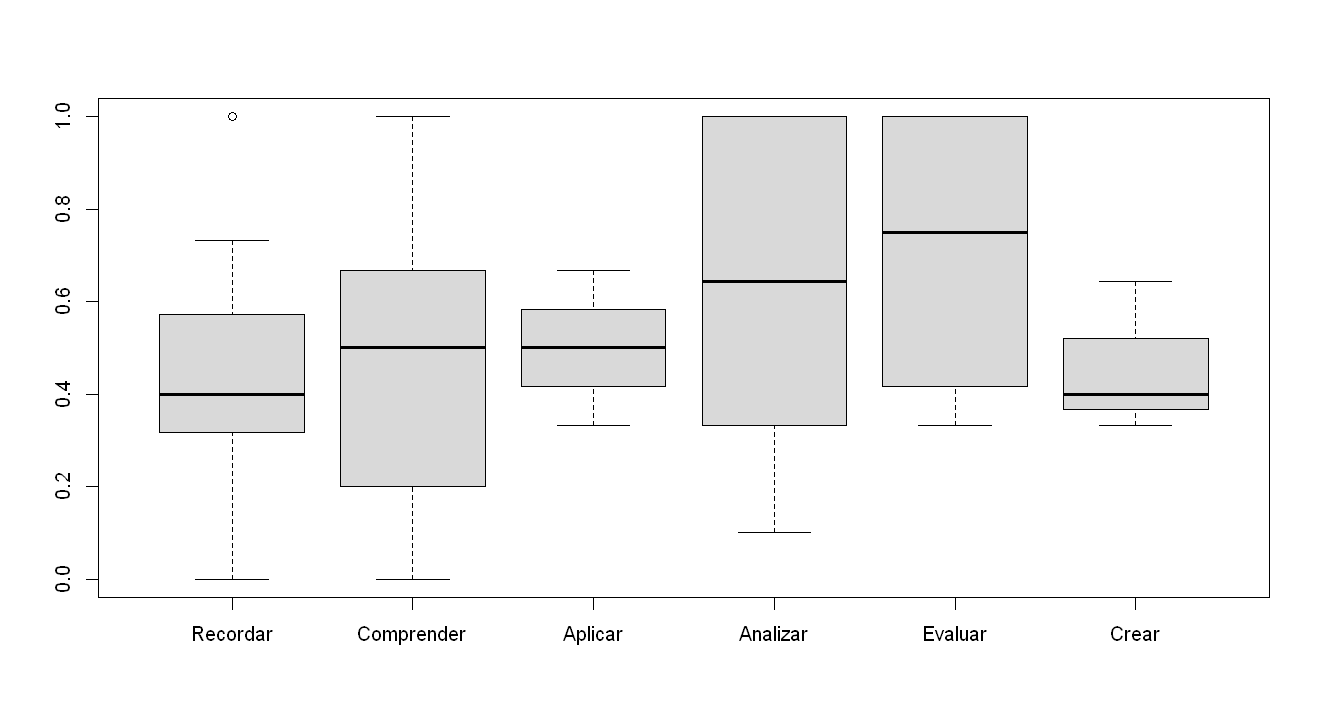

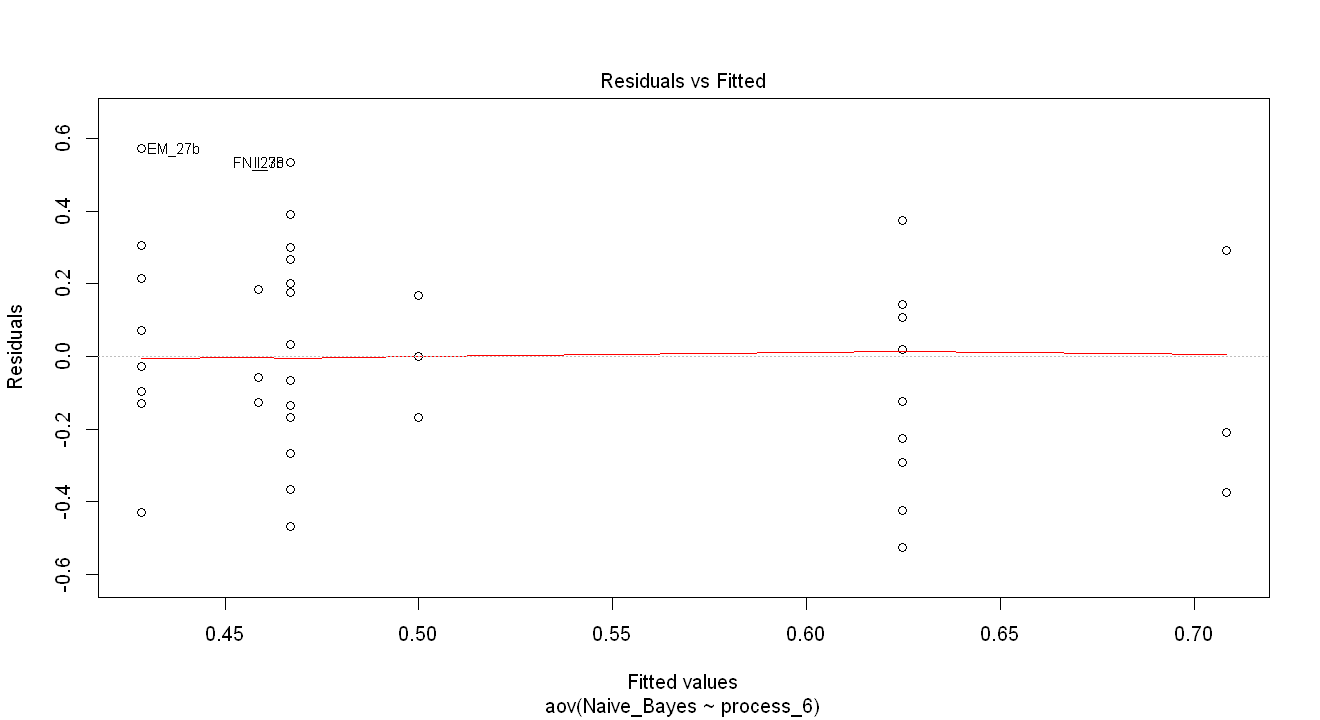

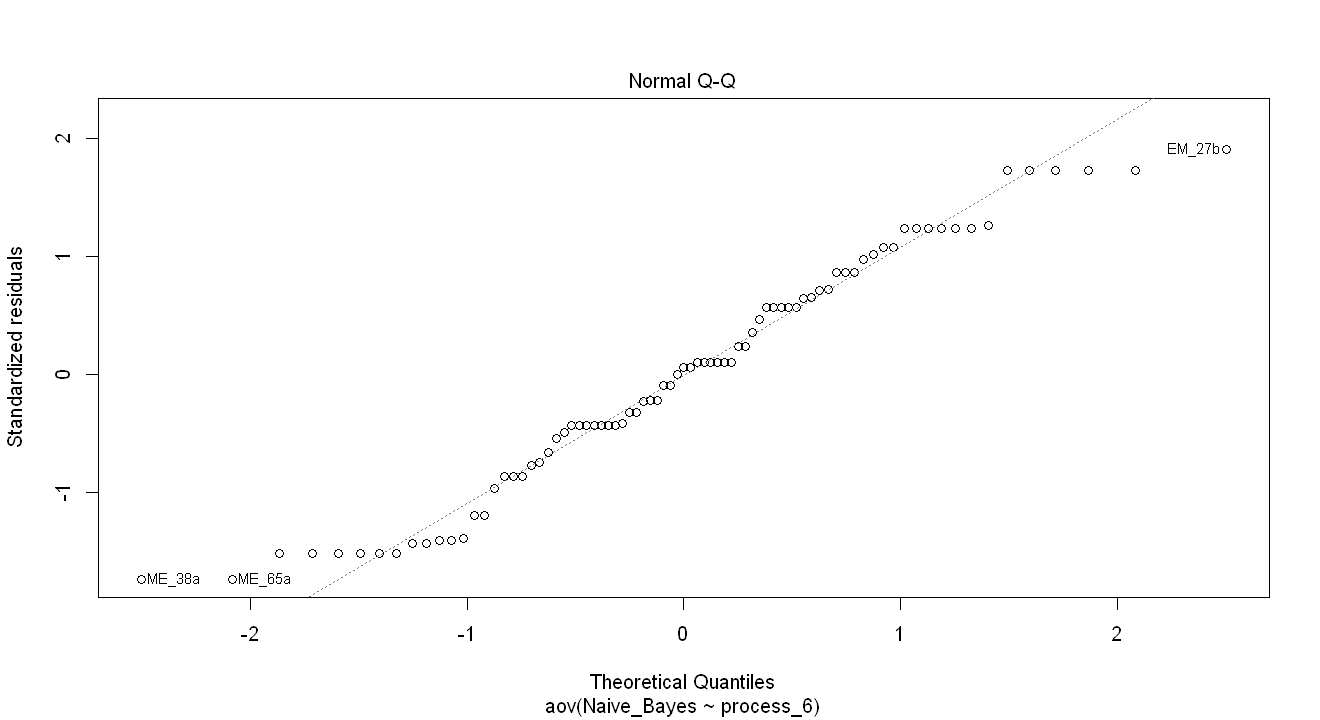

In [29]:
boxplot(Naive_Bayes ~ process_6, data = data_6, col="gray85")
leveneTest(Naive_Bayes ~ process_6, data = data_6)
aov_6_Naive_Bayes <- aov(Naive_Bayes ~ process_6, data = data_6)
summary(aov_6_Naive_Bayes)
plot(aov_6_Naive_Bayes, 1)
plot(aov_6_Naive_Bayes, 2) 


,Df,F value,Pr(>F)
group,5,0.7119673,0.6163342
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.231 0.04621   0.498  0.777
Residuals   75  6.953 0.09271               

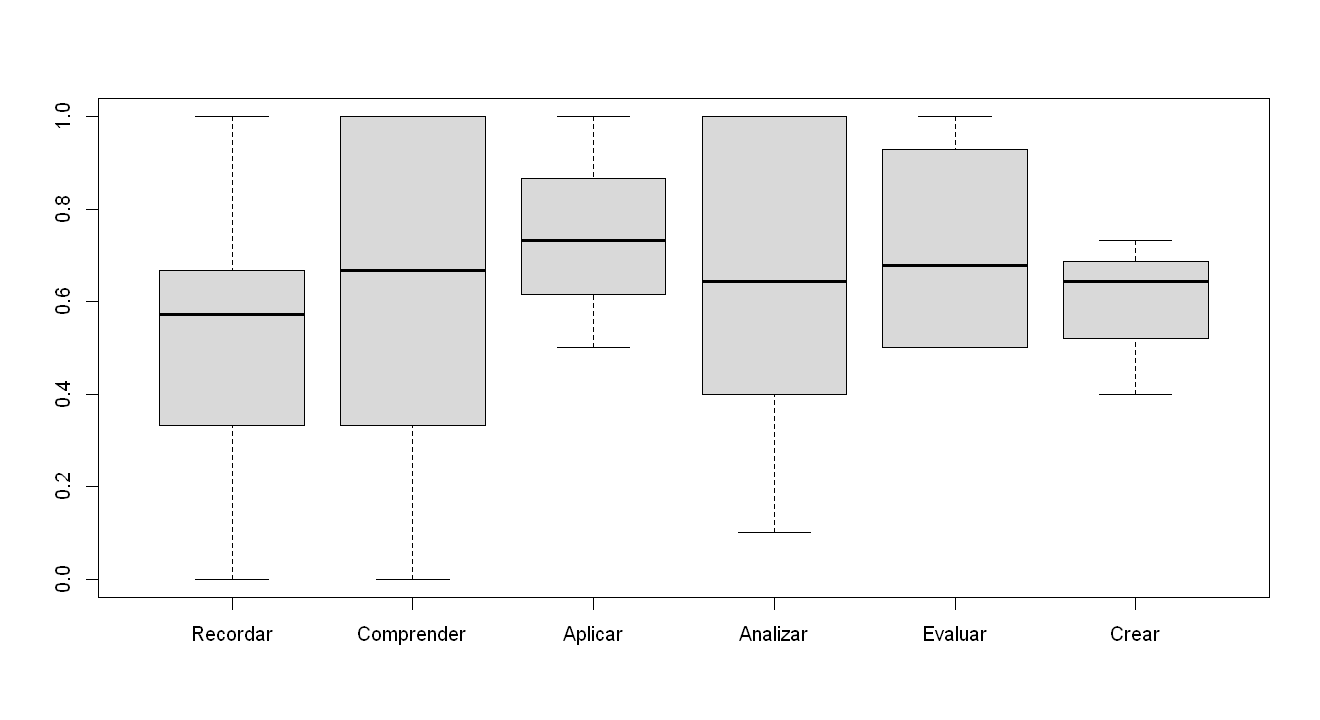

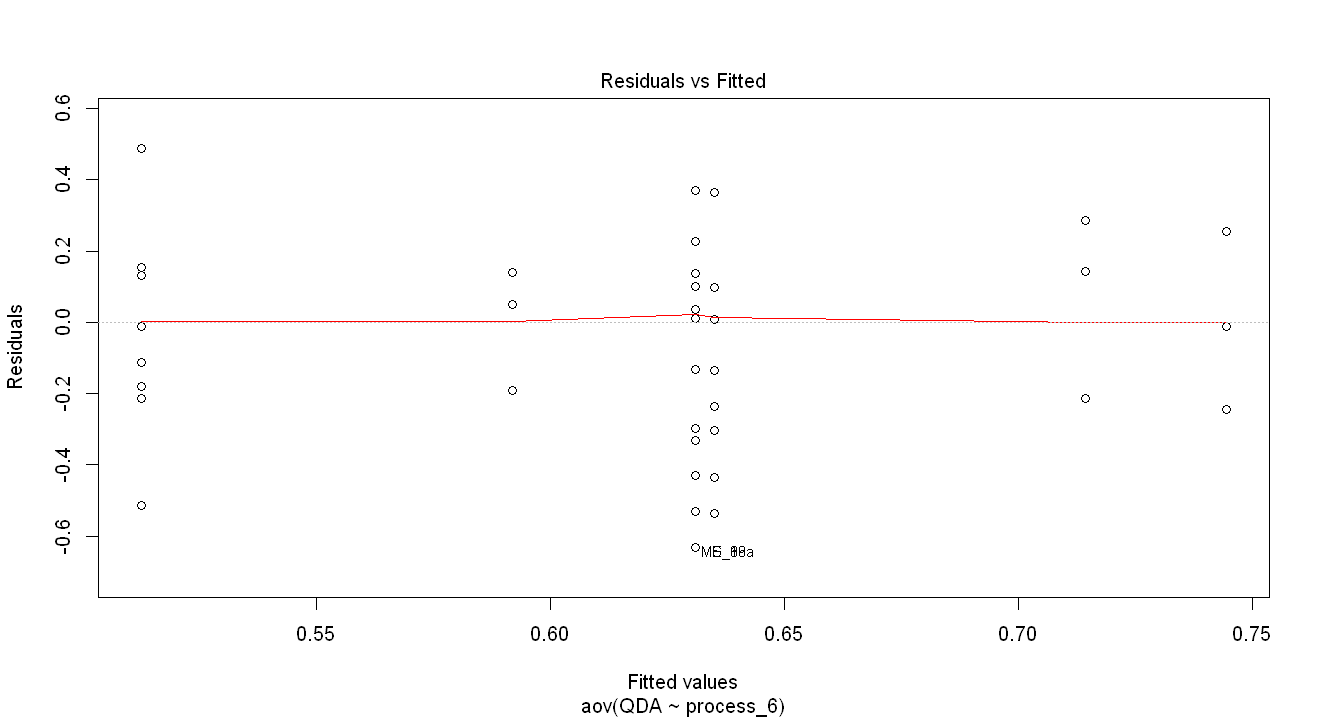

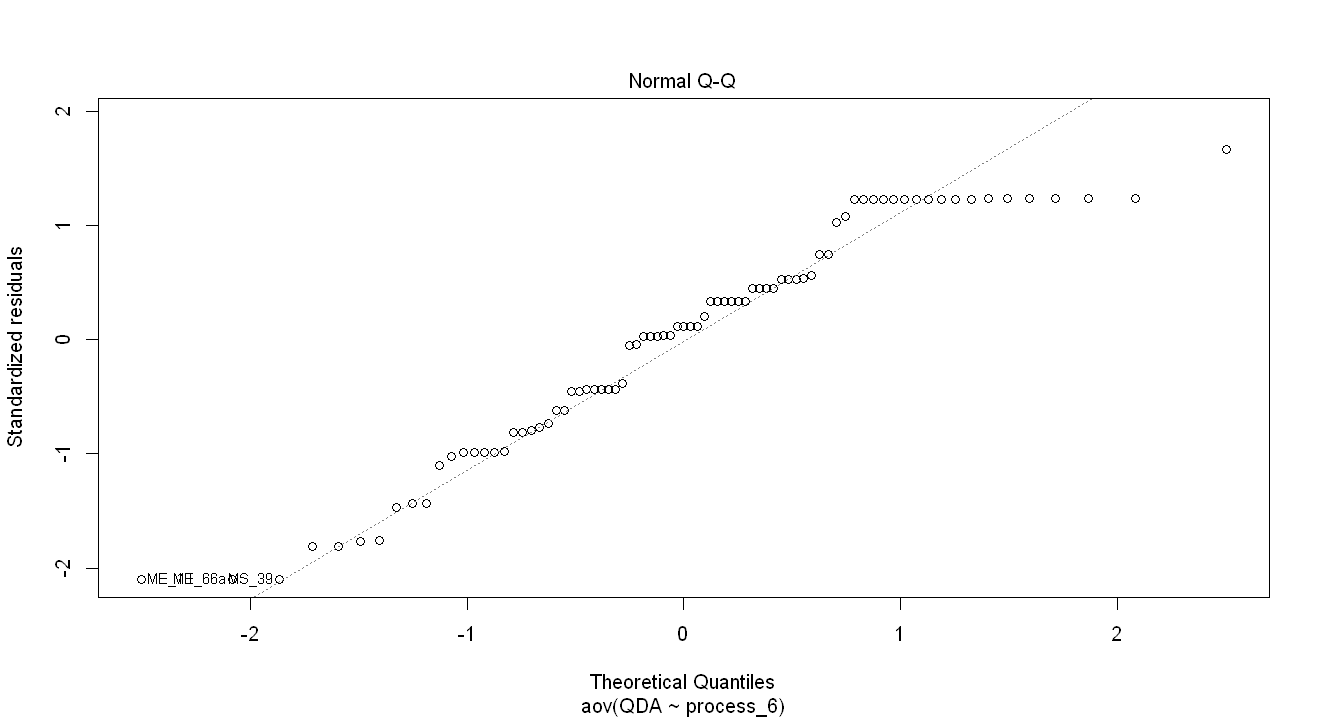

In [30]:
boxplot(QDA ~ process_6, data = data_6, col="gray85")
leveneTest(QDA ~ process_6, data = data_6)
aov_6_QDA <- aov(QDA ~ process_6, data = data_6)
summary(aov_6_QDA)
plot(aov_6_QDA, 1)
plot(aov_6_QDA, 2) 


### Abs IRT

In [31]:
cor.test(abs(data$IRT_difficulty), data$KNN)
cor.test(abs(data$IRT_difficulty), data$RBF_SVM)
cor.test(abs(data$IRT_difficulty), data$Rand_Forest)
cor.test(abs(data$IRT_difficulty), data$AdaBoost)
cor.test(abs(data$IRT_difficulty), data$Naive_Bayes)
cor.test(abs(data$IRT_difficulty), data$QDA)


	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$KNN
t = 0.2592, df = 129, p-value = 0.7959
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1492942  0.1935835
sample estimates:
       cor 
0.02281559 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$RBF_SVM
t = -0.076956, df = 129, p-value = 0.9388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1780940  0.1649417
sample estimates:
         cor 
-0.006775442 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$Rand_Forest
t = 3.0183, df = 129, p-value = 0.003064
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08923612 0.41028186
sample estimates:
      cor 
0.2568305 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$AdaBoost
t = 1.2503, df = 129, p-value = 0.2134
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06328877  0.27577406
sample estimates:
      cor 
0.1094246 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$Naive_Bayes
t = 3.0535, df = 129, p-value = 0.002748
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09221017 0.41277274
sample estimates:
      cor 
0.2596293 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$QDA
t = 1.4483, df = 129, p-value = 0.15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04603447  0.29168680
sample estimates:
      cor 
0.1264898 
